In [34]:
# %pip install ucimlrepo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,f1_score,recall_score,accuracy_score,precision_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from ucimlrepo import fetch_ucirepo
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import warnings 
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, RFE,SelectFromModel
import joblib
BAYESIAN_AVAILABLE = True


In [28]:

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# metadata
print(secondary_mushroom.metadata)

# variable information
print(secondary_mushroom.variables)


{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'venue': 'Scientific Reports', 'year': 2021, 'journal': None, '

### Mushroom Dataset Description

**Target Variable (Binary Class):**  
- `edible = e`  
- `poisonous = p` (also includes mushrooms of unknown edibility)  

---

### Features (20 variables: nominal = n, metrical = m)

1. **cap-diameter (m):** float number in cm  
2. **cap-shape (n):**  
   - bell = b  
   - conical = c  
   - convex = x  
   - flat = f  
   - sunken = s  
   - spherical = p  
   - others = o  
3. **cap-surface (n):**  
   - fibrous = i  
   - grooves = g  
   - scaly = y  
   - smooth = s  
   - shiny = h  
   - leathery = l  
   - silky = k  
   - sticky = t  
   - wrinkled = w  
   - fleshy = e  
4. **cap-color (n):**  
   - brown = n  
   - buff = b  
   - gray = g  
   - green = r  
   - pink = p  
   - purple = u  
   - red = e  
   - white = w  
   - yellow = y  
   - blue = l  
   - orange = o  
   - black = k  
5. **does-bruise-bleed (n):**  
   - bruises-or-bleeding = t  
   - no = f  
6. **gill-attachment (n):**  
   - adnate = a  
   - adnexed = x  
   - decurrent = d  
   - free = e  
   - sinuate = s  
   - pores = p  
   - none = f  
   - unknown = ?  
7. **gill-spacing (n):**  
   - close = c  
   - distant = d  
   - none = f  
8. **gill-color (n):** see `cap-color` + none = f  
9. **stem-height (m):** float number in cm  
10. **stem-width (m):** float number in mm  
11. **stem-root (n):**  
    - bulbous = b  
    - swollen = s  
    - club = c  
    - cup = u  
    - equal = e  
    - rhizomorphs = z  
    - rooted = r  
12. **stem-surface (n):** see `cap-surface` + none = f  
13. **stem-color (n):** see `cap-color` + none = f  
14. **veil-type (n):**  
    - partial = p  
    - universal = u  
15. **veil-color (n):** see `cap-color` + none = f  
16. **has-ring (n):**  
    - ring = t  
    - none = f  
17. **ring-type (n):**  
    - cobwebby = c  
    - evanescent = e  
    - flaring = r  
    - grooved = g  
    - large = l  
    - pendant = p  
    - sheathing = s  
    - zone = z  
    - scaly = y  
    - movable = m  
    - none = f  
    - unknown = ?  
18. **spore-print-color (n):** see `cap-color`  
19. **habitat (n):**  
    - grasses = g  
    - leaves = l  
    - meadows = m  
    - paths = p  
    - heaths = h  
    - urban = u  
    - waste = w  
    - woods = d  
20. **season (n):**  
    - spring = s  
    - summer = u  
    - autumn = a  
    - winter = w  

---

### Class Labels
- **edible = e**  
- **poisonous = p**  


In [29]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [30]:
y

,class
0,p
1,p
2,p
3,p
4,p
...,...
61064,p
61065,p
61066,p
61067,p


## Mushroom Classification Project

### Problem Description
The goal of this project is to classify mushrooms as **edible (e)** or **poisonous (p)** based on 20 descriptive features such as cap shape, cap color, stem characteristics, habitat, and season.  
This is a **binary classification problem** where the target variable is the mushroom class (`edible` or `poisonous`).  

---

### Project Workflow

#### 1. Exploratory Data Analysis (EDA)
- Inspect the dataset structure (rows, columns, data types).  
- Check for missing values and duplicates.  
- Visualize distributions of categorical features (bar plots) and numeric features (histograms, boxplots).  
- Explore correlations between features and the target class.  
- Look for class imbalance in the target variable (edible vs poisonous).  

#### 2. Data Cleaning & Preprocessing
- Handle missing values or unknown entries if present.  
- Encode categorical features (e.g., **One-Hot Encoding** or **Label Encoding**).  
- Scale numerical features (e.g., **StandardScaler** or **MinMaxScaler**).  
- Stratify the dataset when splitting into **training and test sets** to maintain class balance.  
- If class imbalance is significant, apply oversampling techniques (e.g., **SMOTE**).  

#### 3. Feature Selection
To reduce dimensionality and improve generalization, apply feature selection techniques such as:  
- **Filter Methods:** Use statistical tests (e.g., Chi-square, ANOVA F-test, mutual information) to rank features.  
- **Wrapper Methods:** Apply Recursive Feature Elimination (**RFE**) with models like Logistic Regression or Decision Trees.  
- **Embedded Methods:** Leverage feature importance from models (e.g., Decision Tree, Random Forest, Lasso Regression).  
- Compare model performance before and after feature selection to evaluate impact.  

#### 4. Model Training & Evaluation
Train and evaluate the following classification models:  
- **Logistic Regression**  
- **Decision Tree**  
- **Random Forest**  
- **Support Vector Machine (SVM)**  
- **K-Nearest Neighbors (KNN)**  
- **Naive Bayes**  

For each model:  
- Train on the **training set**.  
- Evaluate on the **test set** using:  
  - **Classification Report** (Precision, Recall, F1-score, Accuracy)  
  - **Confusion Matrix**  
  - **Cross-validation (optional)** for stability check  

#### 5. Hyperparameter Tuning
To improve model performance, apply hyperparameter optimization techniques:  
- **Grid Search:** Exhaustively search all combinations of parameters (good for small parameter spaces).  
- **Random Search:** Randomly sample parameter combinations (more efficient for large parameter spaces).  
- **Bayesian Optimization:** Iteratively choose hyperparameters based on past performance (efficient for complex models like Random Forest, SVM, or KNN).  

Compare tuned models with baseline models to measure improvement.  

#### 6. Feature Importance
- Extract **feature importance** from Decision Tree and Random Forest models.  
- Rank features to identify the most influential ones for classification.  
- Use feature importance as a basis for feature selection and model simplification.  

#### 7. Model Comparison
- Compare performance across all models (baseline, tuned, and with feature selection).  
- Use metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to decide the best-performing model.
- Create plot of ROC-AUC curve of each model with different color for comparison  
- Summarize results in a **comparison table** or **bar plot**.  

---

#### 8. Save best models as pickle files

---

### Final Deliverables
- Preprocessed dataset ready for classification.  
- Performance evaluation of six classification models.  
- Insights on class imbalance and handling techniques.  
- Feature selection results (filter, wrapper, and embedded methods).  
- Hyperparameter tuning results from Grid Search, Random Search, and Bayesian Optimization.  
- Feature importance ranking for better model interpretability.  
- Final comparison and recommendation of the best-performing model for mushroom classification.  
- pickle files of the saved models


## EDA And cleaning

In [31]:
X.duplicated().sum()

146

In [32]:

indices_to_keep = X.index[~X.duplicated()]
X.drop_duplicates(inplace=True)
y = y.loc[indices_to_keep]

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          60923 non-null  float64
 1   cap-shape             60923 non-null  object 
 2   cap-surface           46803 non-null  object 
 3   cap-color             60923 non-null  object 
 4   does-bruise-or-bleed  60923 non-null  object 
 5   gill-attachment       51068 non-null  object 
 6   gill-spacing          35861 non-null  object 
 7   gill-color            60923 non-null  object 
 8   stem-height           60923 non-null  float64
 9   stem-width            60923 non-null  float64
 10  stem-root             9387 non-null   object 
 11  stem-surface          22801 non-null  object 
 12  stem-color            60923 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring              60

In [34]:
X.isna().sum()

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
dtype: int64

In [35]:
X.shape

(60923, 20)

In [36]:
y.shape

(60923, 1)

## In this file we imputate the nulls with KNN imputer

In [37]:
X.drop(['veil-color','veil-type','spore-print-color','stem-root'],axis =1 , inplace= True)


In [39]:
from sklearn.impute import KNNImputer

# Columns to impute
cols = ['cap-surface', 'gill-attachment', 'gill-spacing',  'stem-surface', 'ring-type']

# Step 1: Convert categories to numbers
encoders = {}
for col in cols:
    le = LabelEncoder()
    # Fit only on non-missing values
    le.fit(X[col].dropna())
    encoders[col] = le
    # Convert to numbers (missing values stay as NaN)
    X[col] = X[col].map(lambda x: le.transform([x])[0] if pd.notna(x) else x)

# Step 2: Apply KNN imputation
imputer = KNNImputer(n_neighbors=3)
X[cols] = imputer.fit_transform(X[cols])

# Step 3: Convert back to original categories
for col in cols:
    X[col] = X[col].round().astype(int)  # Round to nearest integer
    X[col] = encoders[col].inverse_transform(X[col])  # Convert back to categories


In [40]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,2.0,o,f,2.0,0.0,w,16.95,17.09,y,w,t,g,d,w
1,16.60,x,2.0,o,f,2.0,0.0,w,17.99,18.19,y,w,t,g,d,u
2,14.07,x,2.0,o,f,2.0,0.0,w,17.80,17.74,y,w,t,g,d,w
3,14.17,f,3.0,e,f,2.0,0.0,w,15.77,15.98,y,w,t,p,d,w
4,14.64,x,3.0,o,f,2.0,0.0,w,16.53,17.20,y,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,7.0,y,f,3.0,2.0,f,3.93,6.22,s,y,f,f,d,a
61065,1.27,f,7.0,y,f,3.0,2.0,f,3.18,5.43,s,y,f,f,d,a
61066,1.27,s,7.0,y,f,3.0,2.0,f,3.86,6.37,s,y,f,f,d,u
61067,1.24,f,7.0,y,f,3.0,2.0,f,3.56,5.44,s,y,f,f,d,u


In [41]:
X.isna().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

## Visualizations

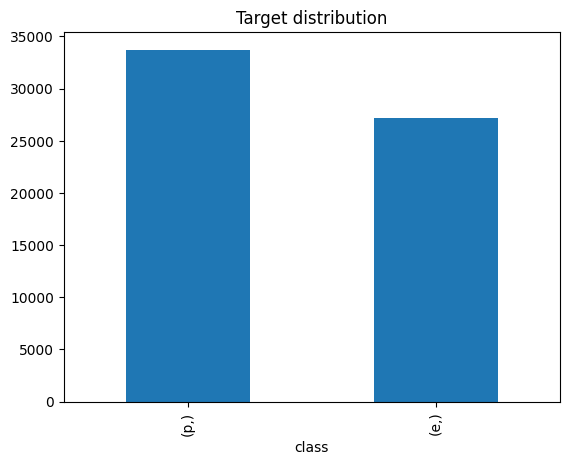

In [42]:
y.value_counts().plot(kind ='bar')
plt.xlabel("class")
plt.title ("Target distribution")
plt.show()

In [43]:
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

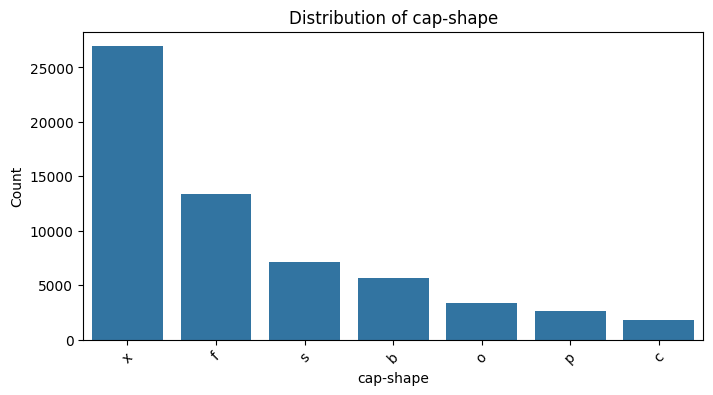

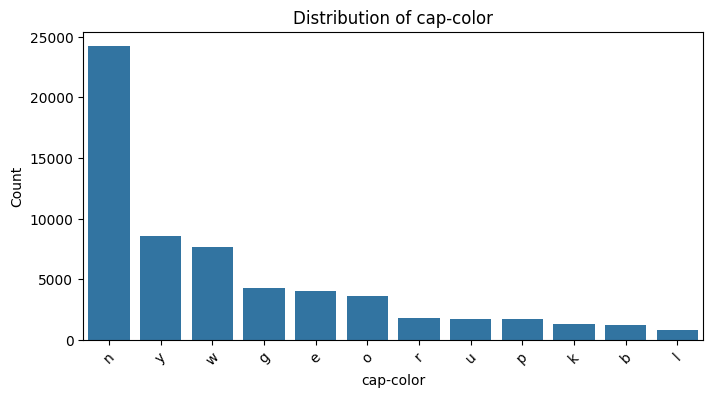

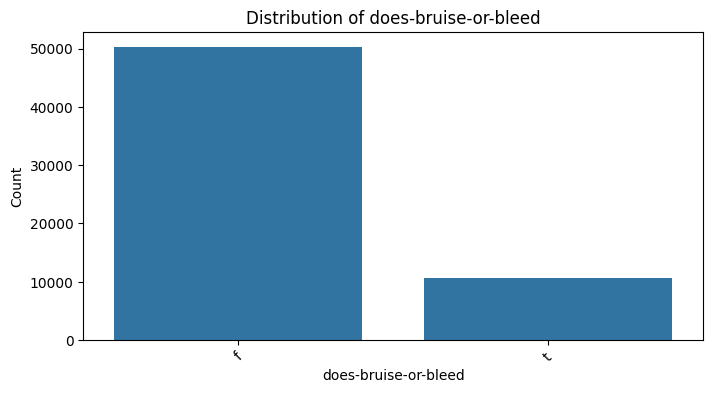

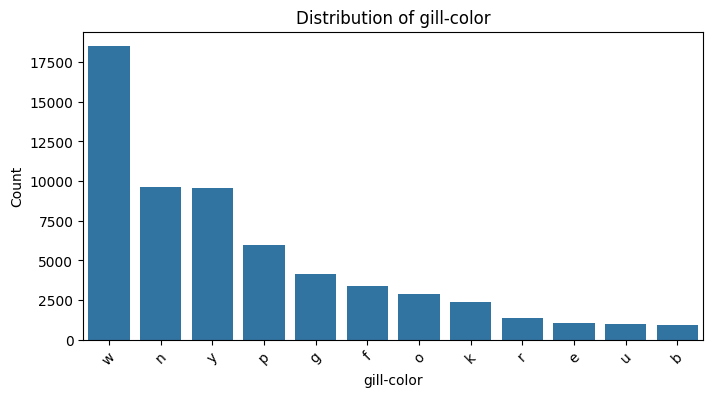

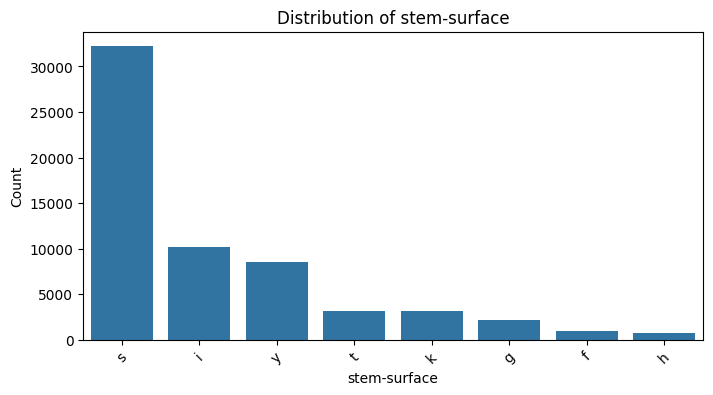

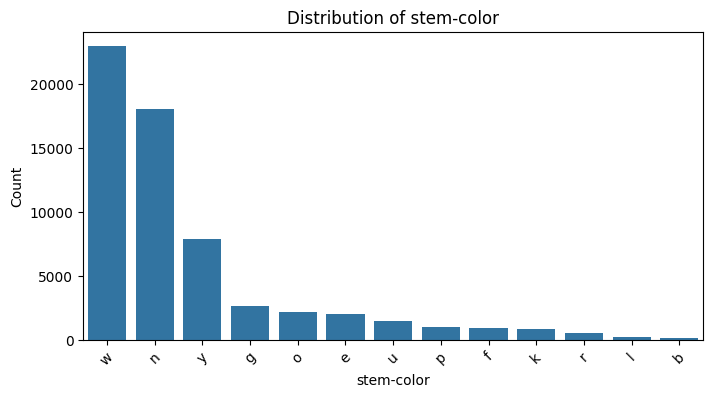

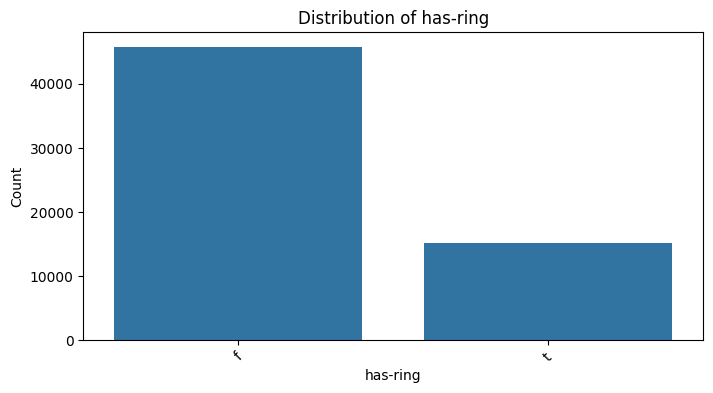

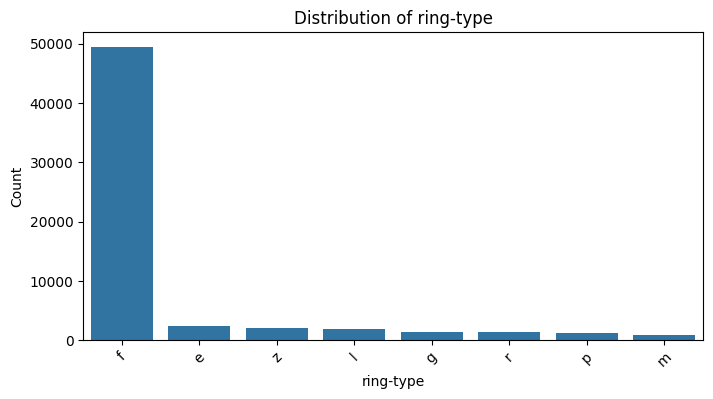

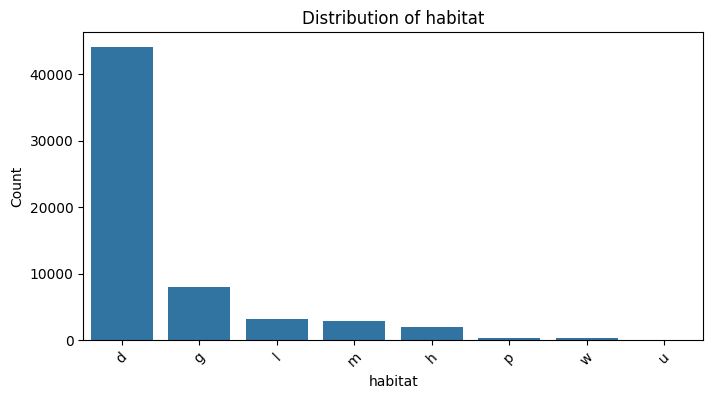

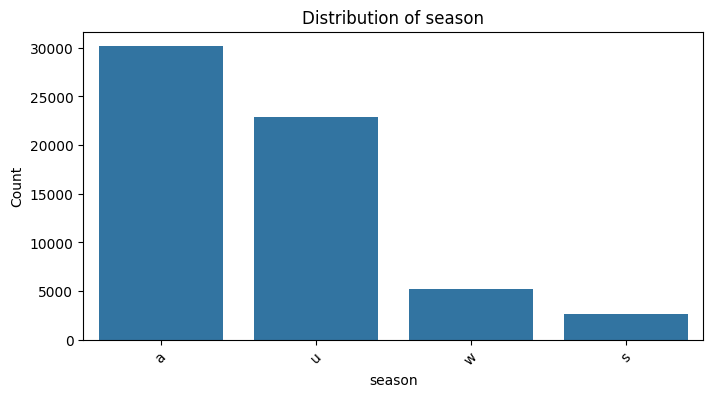

In [44]:
for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=X, x=col, order=X[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()

### Drop the most baises columns

In [45]:
X.drop(columns=['ring-type','habitat'],axis=1 ,inplace= True)

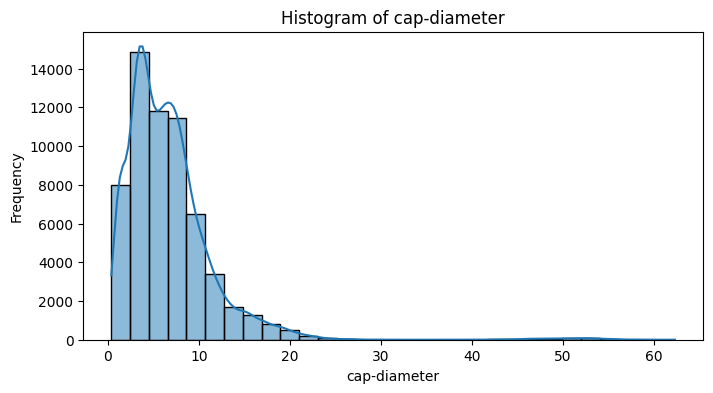

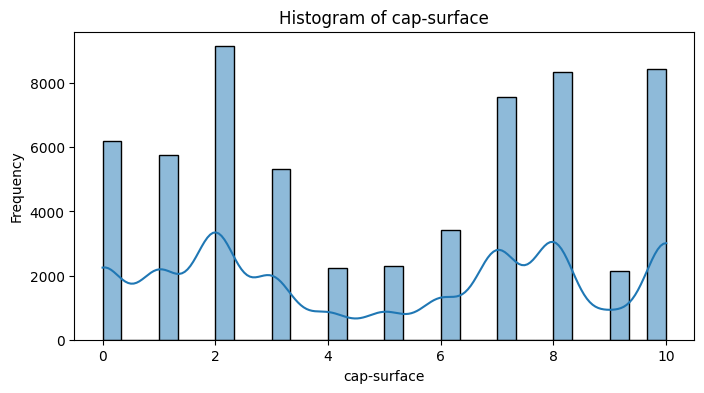

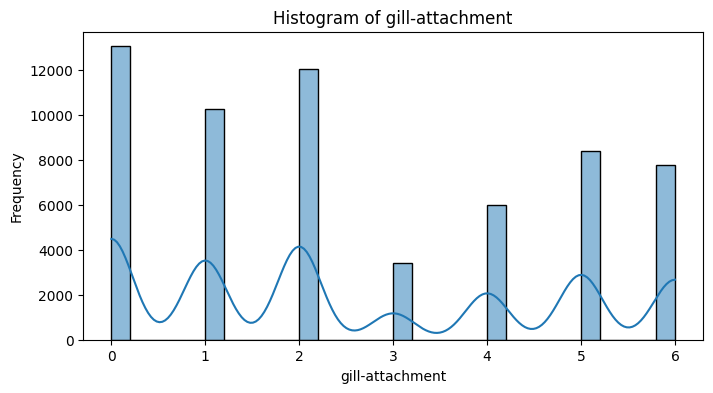

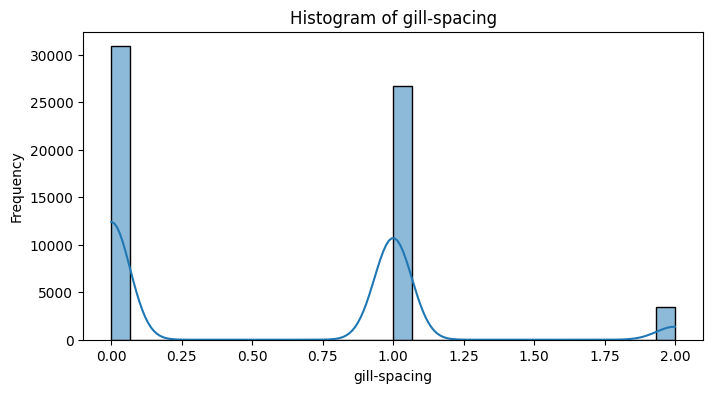

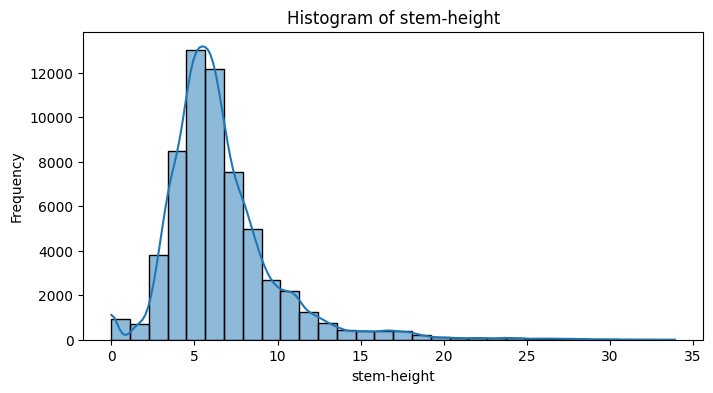

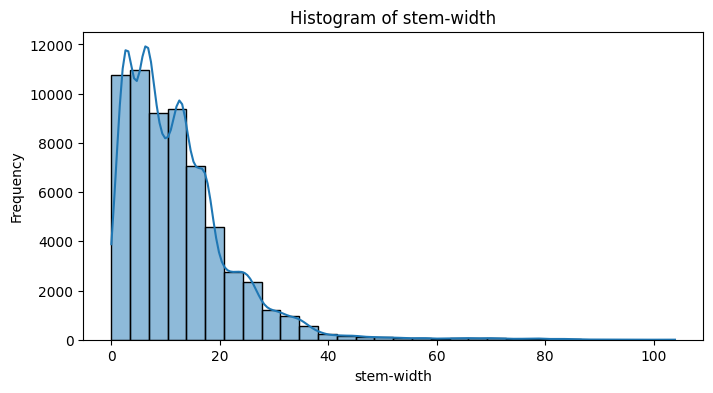

In [46]:
for col in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(X[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Custom scalar to handle many columns for outliers and scaling

In [47]:

class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.power = PowerTransformer(method='yeo-johnson')
        self.robust = RobustScaler()

    def fit(self, X, y=None):
        self.power.fit(X[['stem-width', 'stem-height', 'cap-diameter']])
        self.robust.fit(X[['stem-width', 'stem-height', 'cap-diameter']])
        return self

    def transform(self, X):
        X_copy = X.copy()


        X_copy[['stem-width', 'stem-height', 'cap-diameter']] = \
            self.power.transform(X_copy[['stem-width', 'stem-height', 'cap-diameter']])

        X_copy[['stem-width', 'stem-height', 'cap-diameter']] = \
            self.robust.transform(X_copy[['stem-width', 'stem-height', 'cap-diameter']])

        return X_copy




### Features by target

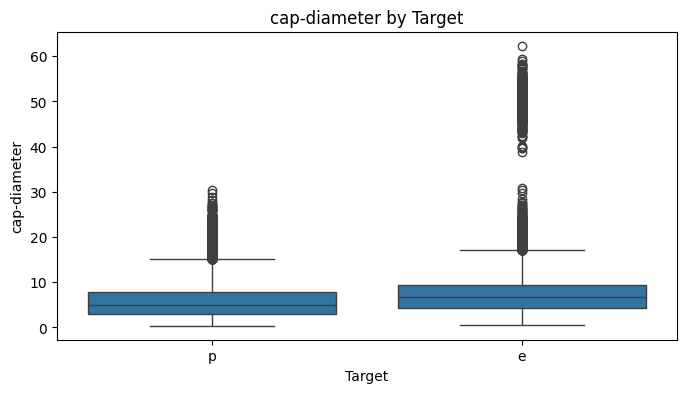

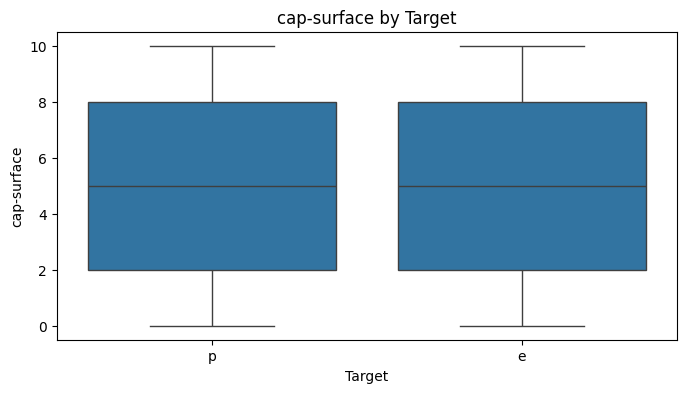

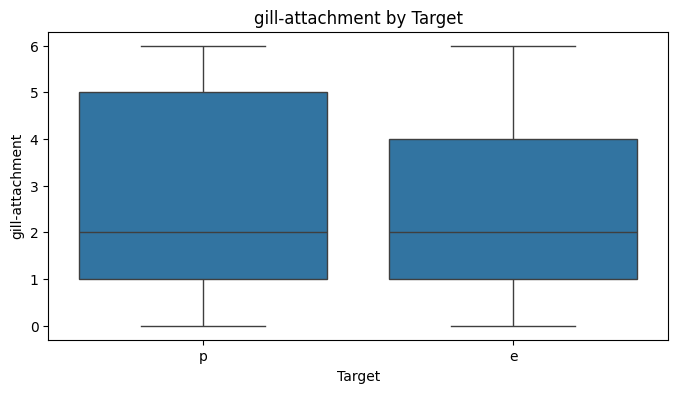

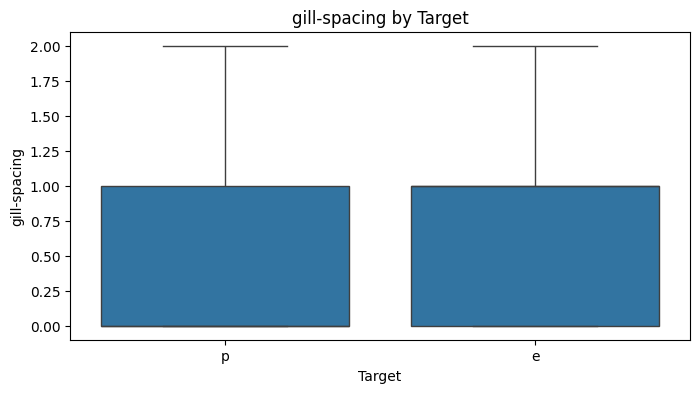

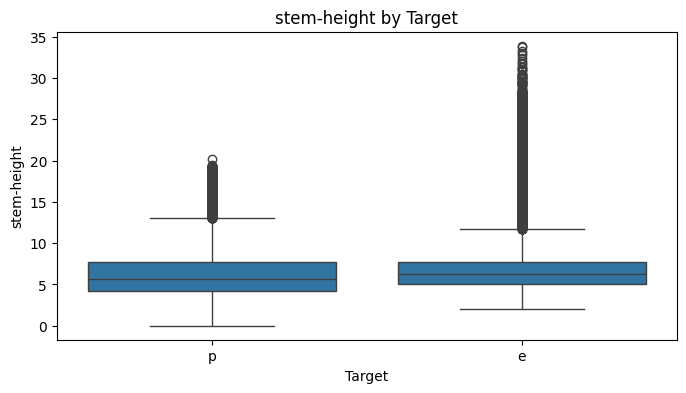

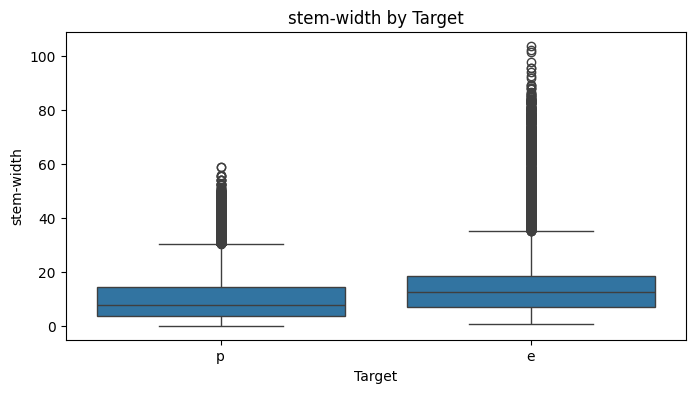

In [48]:
y = y.squeeze()   
for col in numerical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=pd.concat([X[col], y], axis=1), x=y.name, y=col)
    plt.title(f"{col} by Target")
    plt.xlabel("Target")
    plt.ylabel(col)
    plt.show()


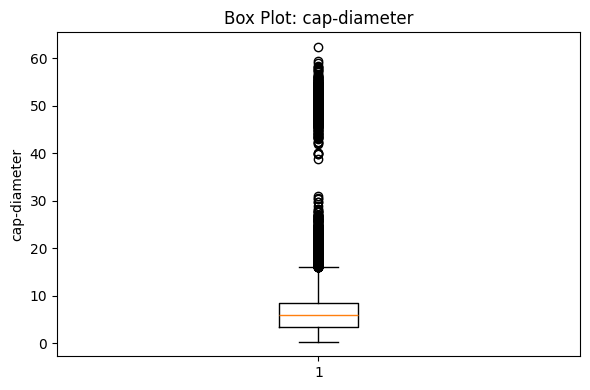

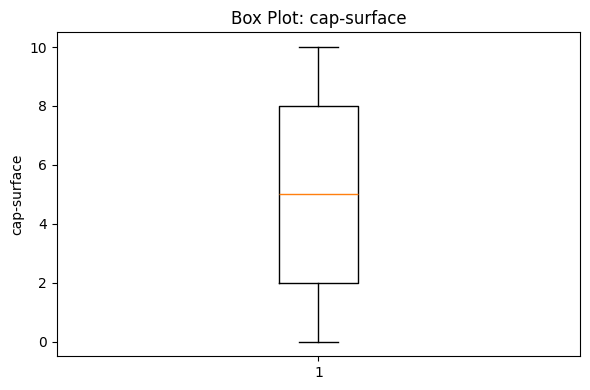

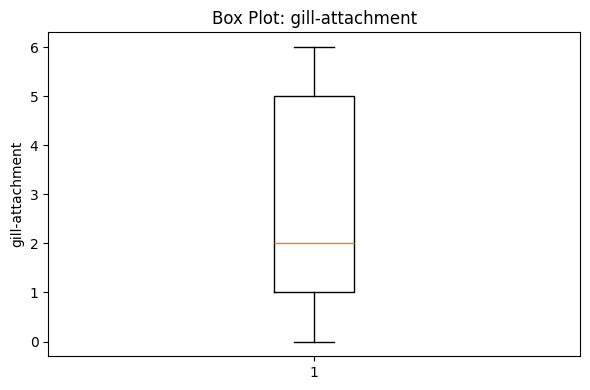

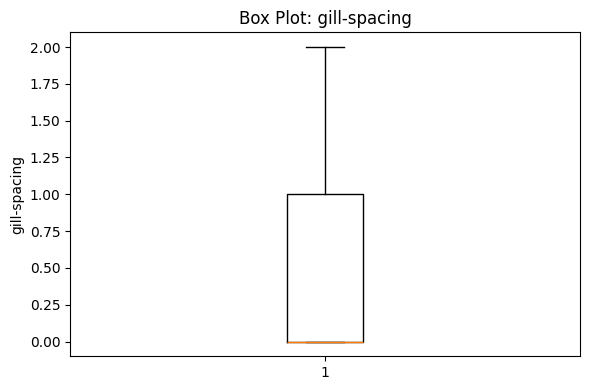

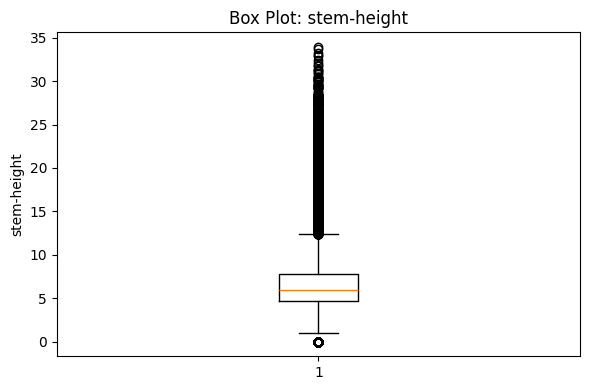

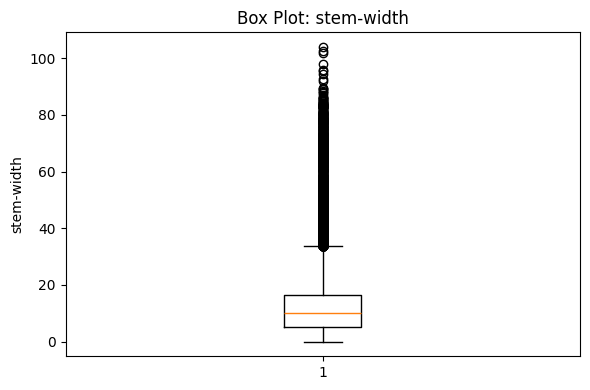

In [49]:
for col in numerical_features :
    plt.figure(figsize=(6, 4))
    plt.boxplot(X[col], vert=True, showfliers=True)
    plt.title(f"Box Plot: {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

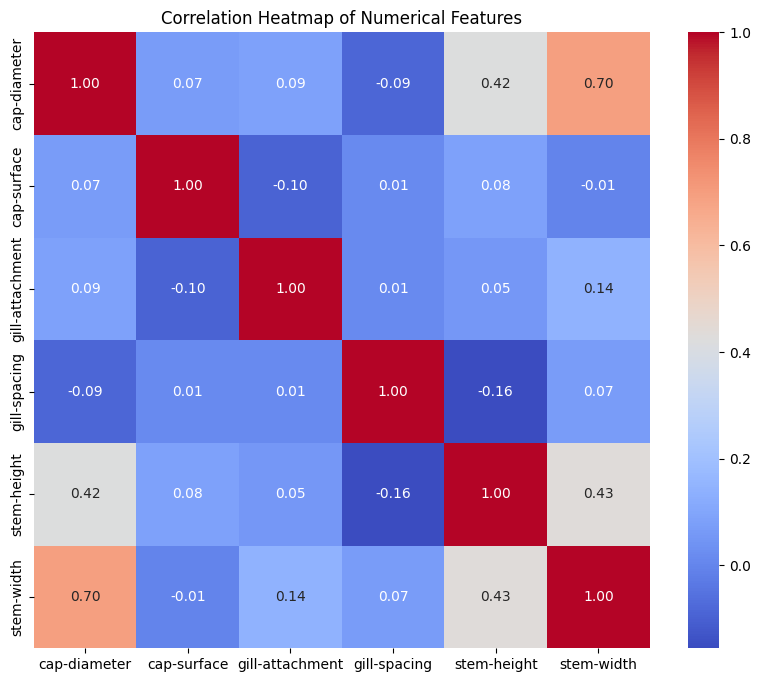

In [50]:
corr = X[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [51]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,season
0,15.26,x,2.0,o,f,2.0,0.0,w,16.95,17.09,y,w,t,w
1,16.60,x,2.0,o,f,2.0,0.0,w,17.99,18.19,y,w,t,u
2,14.07,x,2.0,o,f,2.0,0.0,w,17.80,17.74,y,w,t,w
3,14.17,f,3.0,e,f,2.0,0.0,w,15.77,15.98,y,w,t,w
4,14.64,x,3.0,o,f,2.0,0.0,w,16.53,17.20,y,w,t,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,7.0,y,f,3.0,2.0,f,3.93,6.22,s,y,f,a
61065,1.27,f,7.0,y,f,3.0,2.0,f,3.18,5.43,s,y,f,a
61066,1.27,s,7.0,y,f,3.0,2.0,f,3.86,6.37,s,y,f,u
61067,1.24,f,7.0,y,f,3.0,2.0,f,3.56,5.44,s,y,f,u


## Building column transformer to apply the custom scalar and encoding of frequency for meaium category data and bayseien for high category data and ordinal for small category data 

In [52]:

# Feature groups
binary_features = ['does-bruise-or-bleed', 'gill-spacing', 'has-ring']
medium_features = ['cap-shape', 'cap-surface',  'season','gill-attachment']
high_features = ['cap-color', 'gill-color', 'stem-surface', 'stem-color']

# Transformers
numeric_transformer = Pipeline([
    ('Custom_scalar', CustomScaler())
])

binary_transformer = Pipeline([
    ('label', ce.OrdinalEncoder())
])

medium_transformer = Pipeline([
    ('freq', ce.CountEncoder())
])

high_transformer = Pipeline([
    ('bayes', ce.TargetEncoder())   
])

# Build ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_features),
    ('bin', binary_transformer, binary_features),
    ('med', medium_transformer, medium_features),
    ('high', high_transformer, high_features)
],remainder='passthrough')




In [53]:

le =LabelEncoder()
y =le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train =preprocessor.fit_transform(X_train,y_train)
X_test =preprocessor.transform(X_test)



In [54]:
X_train

array([[-1.28446469,  3.        ,  2.        , ...,  0.68846054,
         0.50609567,  0.42803586],
       [-0.97269004, 10.        ,  2.        , ...,  0.45337534,
         0.33229934,  0.5962086 ],
       [-1.05897536,  0.        ,  4.        , ...,  0.61278863,
         0.50609567,  0.68230413],
       ...,
       [-1.30166235,  8.        ,  0.        , ...,  0.58892397,
         1.        ,  0.60137457],
       [-1.23115837,  8.        ,  1.        , ...,  0.5762419 ,
         0.4375491 ,  0.60137457],
       [-1.2632452 ,  0.        ,  6.        , ...,  0.59280936,
         0.50609567,  0.875     ]])

# Modeling

# 1. normal models

TRAINING MODELS AND COLLECTING RESULTS

Training LogReg...
LogReg: 0.6993
LogReg Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      5436
           1       0.72      0.76      0.74      6749

    accuracy                           0.70     12185
   macro avg       0.70      0.69      0.69     12185
weighted avg       0.70      0.70      0.70     12185

--------------------------------------------------

Training DecisionTree...
DecisionTree: 0.9967
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6749

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185

--------------------------------------------------

Training RandomForest...
RandomForest: 0.9820
RandomFore

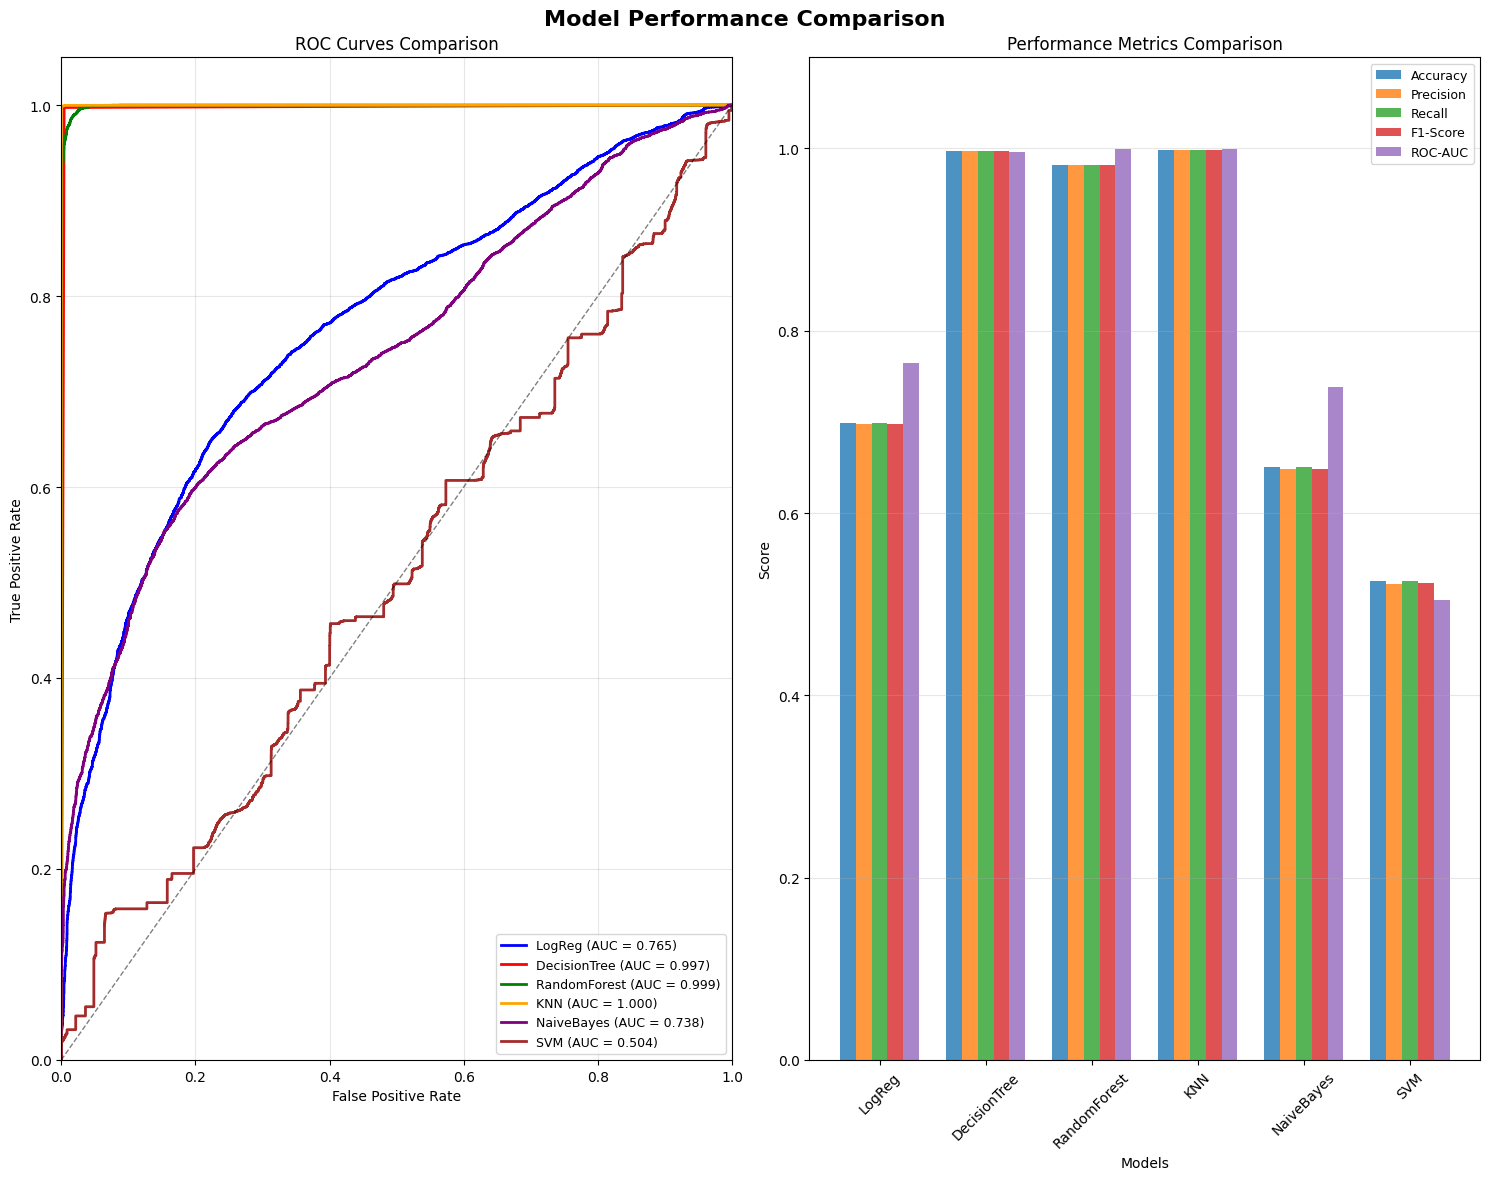


BEST PERFORMING MODELS
Best Accuracy: KNN (0.9985)
Best Precision: KNN (0.9985)
Best Recall: KNN (0.9985)
Best F1-Score: KNN (0.9985)
Best ROC-AUC: KNN (0.9998)

DETAILED RESULTS TABLE
       Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
      LogReg    0.6993     0.6980  0.6993    0.6978   0.7647
DecisionTree    0.9967     0.9967  0.9967    0.9967   0.9966
RandomForest    0.9820     0.9823  0.9820    0.9820   0.9992
         KNN    0.9985     0.9985  0.9985    0.9985   0.9998
  NaiveBayes    0.6506     0.6486  0.6506    0.6488   0.7385
         SVM    0.5258     0.5220  0.5258    0.5232   0.5042


In [55]:


# Models dictionary
models = {
    "LogReg": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_split=50,min_samples_leaf=20,max_features='sqrt',bootstrap=True,random_state=42,n_jobs=-1),
    "KNN": KNeighborsClassifier(),  
    "NaiveBayes": GaussianNB(),  
    "SVM": SVC(kernel='linear',C=1.0,cache_size=1000,max_iter=1000,probability=True,random_state=42)

}

# Storage for results
results = []
roc_curves = {}
model_predictions = {}

print("=" * 60)
print("TRAINING MODELS AND COLLECTING RESULTS")
print("=" * 60)

# Train models and collect results
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get probabilities for ROC curve
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        # For models without probability/decision function, use predicted values
        y_proba = y_pred.astype(float)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # ROC AUC (handle potential issues)
    try:
        roc_auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, roc_auc)
    except:
        roc_auc = np.nan
        roc_curves[name] = (np.array([0, 1]), np.array([0, 1]), np.nan)
    
    # Store results
    results.append([name, acc, prec, rec, f1, roc_auc])
    model_predictions[name] = y_pred
    
    # Print accuracy and classification report
    print(f"{name}: {acc:.4f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

print("\n" + "=" * 60)
print("VISUALIZATION AND COMPARISON")
print("=" * 60)

# Create comparison DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
print("\nResults Summary:")
print(df_results.round(4))

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# 1. ROC Curves Plot
ax1 = axes[0]   
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, (name, (fpr, tpr, auc)) in enumerate(roc_curves.items()):
    if not np.isnan(auc):
        ax1.plot(fpr, tpr, color=colors[i], lw=2, 
                label=f'{name} (AUC = {auc:.3f})')
    else:
        ax1.plot([0, 1], [0, 1], color=colors[i], lw=2, linestyle='--',
                label=f'{name} (AUC = N/A)')

ax1.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--', alpha=0.5)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves Comparison')
ax1.legend(loc="lower right", fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Metrics Comparison Bar Plot
ax2 = axes[1]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(df_results))
width = 0.15

for i, metric in enumerate(metrics):
    values = df_results[metric].fillna(0)  # Handle NaN values
    ax2.bar(x + i*width, values, width, label=metric, alpha=0.8)

ax2.set_xlabel('Models')
ax2.set_ylabel('Score')
ax2.set_title('Performance Metrics Comparison')
ax2.set_xticks(x + width*2)
ax2.set_xticklabels(df_results['Model'], rotation=45)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 1.1)





plt.tight_layout()
plt.show()

# Print best performing models
print("\n" + "=" * 60)
print("BEST PERFORMING MODELS")
print("=" * 60)
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    if metric == 'ROC-AUC':
        best_idx = df_results[metric].fillna(0).idxmax()
    else:
        best_idx = df_results[metric].idxmax()
    best_model = df_results.loc[best_idx, 'Model']
    best_score = df_results.loc[best_idx, metric]
    print(f"Best {metric}: {best_model} ({best_score:.4f})")

# Create a summary table
print("\n" + "=" * 60)
print("DETAILED RESULTS TABLE")
print("=" * 60)
print(df_results.to_string(index=False, float_format='%.4f'))

### in the knn imputer it differs from the models the log reg is better with unkown with 71 accuracy and in the imputer is 70 and the svm is better here with accuracy 52 and in the unkown 43 and the NB is 65 percent accuracy here and there 63

## 2. hyperparmeter tuned models

In [56]:

# print("=" * 80)
# print("HYPERPARAMETER OPTIMIZATION WITH DIFFERENT TECHNIQUES")
# print("=" * 80)

# # Cross-validation strategy
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Storage for results
# optimization_results = []
# best_models = {}
# roc_curves = {}
# model_predictions = {}

# # 1. GRID SEARCH - Logistic Regression
# print(f"\n{'='*20} GRID SEARCH {'='*20}")
# print("Optimizing Logistic Regression...")

# logistic_param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'solver': ['liblinear', 'saga'],
#     'max_iter': [1000, 2000]
# }

# logistic_grid = GridSearchCV(
#     LogisticRegression(random_state=42),
#     logistic_param_grid,
#     cv=cv,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

# logistic_grid.fit(X_train, y_train)
# best_models['LogisticRegression_GridSearch'] = logistic_grid.best_estimator_
# print(f"Best Logistic Regression params: {logistic_grid.best_params_}")
# print(f"Best CV score: {logistic_grid.best_score_:.4f}")

# # 2. GRID SEARCH - KNN
# print("\nOptimizing KNN...")

# knn_param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan', 'minkowski'],
#     'p': [1, 2]
# }

# knn_grid = GridSearchCV(
#     KNeighborsClassifier(),
#     knn_param_grid,
#     cv=cv,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

# knn_grid.fit(X_train, y_train)
# best_models['KNN_GridSearch'] = knn_grid.best_estimator_
# print(f"Best KNN params: {knn_grid.best_params_}")
# print(f"Best CV score: {knn_grid.best_score_:.4f}")

# # 3. GRID SEARCH - Naive Bayes
# print("\nOptimizing Naive Bayes...")

# nb_param_grid = {
#     'var_smoothing': np.logspace(-10, -1, 10)
# }

# nb_grid = GridSearchCV(
#     GaussianNB(),
#     nb_param_grid,
#     cv=cv,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

# nb_grid.fit(X_train, y_train)
# best_models['NaiveBayes_GridSearch'] = nb_grid.best_estimator_
# print(f"Best Naive Bayes params: {nb_grid.best_params_}")
# print(f"Best CV score: {nb_grid.best_score_:.4f}")

# # 4. RANDOM SEARCH - Decision Tree
# print(f"\n{'='*20} RANDOM SEARCH {'='*20}")
# print("Optimizing Decision Tree...")

# dt_param_dist = {
#     'max_depth': [3, 5, 7, 10, 15, 20, None],
#     'min_samples_split': [2, 5, 10, 20, 50],
#     'min_samples_leaf': [1, 2, 5, 10, 20],
#     'max_features': ['sqrt', 'log2', None],
#     'criterion': ['gini', 'entropy'],
#     'max_leaf_nodes': [None, 10, 20, 50, 100]
# }

# dt_random = RandomizedSearchCV(
#     DecisionTreeClassifier(random_state=42),
#     dt_param_dist,
#     n_iter=100,
#     cv=cv,
#     scoring='accuracy',
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# dt_random.fit(X_train, y_train)
# best_models['DecisionTree_RandomSearch'] = dt_random.best_estimator_
# print(f"Best Decision Tree params: {dt_random.best_params_}")
# print(f"Best CV score: {dt_random.best_score_:.4f}")

# # 5. BAYESIAN OPTIMIZATION - Random Forest and SVM
# if BAYESIAN_AVAILABLE:
#     print(f"\n{'='*20} BAYESIAN OPTIMIZATION {'='*20}")
#     print("Optimizing Random Forest...")
    
#     rf_search_space = {
#         'n_estimators': Integer(50, 200),
#         'max_depth': Integer(3, 20),
#         'min_samples_split': Integer(2, 50),
#         'min_samples_leaf': Integer(1, 20),
#         'max_features': Categorical(['sqrt', 'log2']),
#         'bootstrap': Categorical([True, False])
#     }
    
#     rf_bayes = BayesSearchCV(
#         RandomForestClassifier(random_state=42, n_jobs=-1),
#         rf_search_space,
#         n_iter=50,
#         cv=cv,
#         scoring='accuracy',
#         n_jobs=-1,
#         random_state=42,
#         verbose=1
#     )
    
#     rf_bayes.fit(X_train, y_train)
#     best_models['RandomForest_BayesianOpt'] = rf_bayes.best_estimator_
#     print(f"Best Random Forest params: {rf_bayes.best_params_}")
#     print(f"Best CV score: {rf_bayes.best_score_:.4f}")
    
#     print("\nOptimizing SVM...")
    
#     svm_search_space = {
#         'C': Real(0.01, 100, prior='log-uniform'),
#         'gamma': Real(0.001, 1, prior='log-uniform'),
#         'kernel': Categorical(['rbf', 'poly', 'sigmoid']),
#         'degree': Integer(2, 5)  # Only used for poly kernel
#     }
    
#     svm_bayes = BayesSearchCV(
#         SVC(random_state=42, probability=True, cache_size=1000),
#         svm_search_space,
#         n_iter=30,
#         cv=cv,
#         scoring='accuracy',
#         n_jobs=-1,
#         random_state=42,
#         verbose=1
#     )
    
#     svm_bayes.fit(X_train, y_train)
#     best_models['SVM_BayesianOpt'] = svm_bayes.best_estimator_
#     print(f"Best SVM params: {svm_bayes.best_params_}")
#     print(f"Best CV score: {svm_bayes.best_score_:.4f}")

# else:
#     # Fallback to Grid Search for Random Forest and SVM
#     print(f"\n{'='*20} GRID SEARCH (Fallback) {'='*20}")
#     print("Optimizing Random Forest...")
    
#     rf_param_grid = {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [5, 10, 15, None],
#         'min_samples_split': [2, 10, 20],
#         'min_samples_leaf': [1, 5, 10],
#         'max_features': ['sqrt', 'log2']
#     }
    
#     rf_grid = GridSearchCV(
#         RandomForestClassifier(random_state=42, n_jobs=-1),
#         rf_param_grid,
#         cv=cv,
#         scoring='accuracy',
#         n_jobs=-1,
#         verbose=1
#     )
    
#     rf_grid.fit(X_train, y_train)
#     best_models['RandomForest_GridSearch'] = rf_grid.best_estimator_
    
#     print("\nOptimizing SVM...")
    
#     svm_param_grid = {
#         'C': [0.1, 1, 10, 100],
#         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
#         'kernel': ['rbf', 'poly', 'sigmoid']
#     }
    
#     svm_grid = GridSearchCV(
#         SVC(random_state=42, probability=True, cache_size=1000),
#         svm_param_grid,
#         cv=cv,
#         scoring='accuracy',
#         n_jobs=-1,
#         verbose=1
#     )
    
#     svm_grid.fit(X_train, y_train)
#     best_models['SVM_GridSearch'] = svm_grid.best_estimator_

# print("\n" + "=" * 80)
# print("TRAINING OPTIMIZED MODELS AND COLLECTING RESULTS")
# print("=" * 80)

# Train optimized models and collect results


### Best **Random Forest** params: OrderedDict({'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}) Best CV score: 1.0000
### Best **Decision Tree** params: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}Best CV score: 0.9961 
### Best **Naive Bayes** params: {'var_smoothing': 1e-10} Best CV score: 0.7225

### Best **KNN** params: {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'} Best CV score: 0.9998

### Best **Logistic Regression** params: {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'} Best CV score: 0.7207

In [57]:

# Models dictionary
tuned_models = {
    "LogReg": LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='liblinear', random_state=42),
    "DecisionTree": DecisionTreeClassifier(min_samples_split=10, 
                                           min_samples_leaf=5, 
                                           max_leaf_nodes=None, 
                                           max_features=None, 
                                           max_depth=None,
                                           criterion='gini', random_state=42),
    "RandomForest": RandomForestClassifier(bootstrap=True,
                                           max_depth=20, 
                                           max_features='sqrt', 
                                           min_samples_leaf=1, 
                                           min_samples_split=2, 
                                           n_estimators=200,
                                           random_state=42),
    "KNN": KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1, weights='distance'),  
    "NaiveBayes": GaussianNB(var_smoothing=1e-10)
}

# Storage for results
tuned_results = []
tuned_roc_curves = {}
tuned_model_predictions = {}
tuned_training_predictions = {}

print("=" * 60)
print("TRAINING MODELS AND COLLECTING RESULTS")
print("=" * 60)

# Train models and collect results
for name, model in tuned_models.items():
    print(f"\nTraining {name}...")
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Make predictions on both train and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Get probabilities for ROC curve (test set)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        # For models without probability/decision function, use predicted values
        y_proba = y_pred_test.astype(float)
    
    # Calculate metrics for training set
    train_acc = accuracy_score(y_train, y_pred_train)
    train_prec = precision_score(y_train, y_pred_train, average='weighted')
    train_rec = recall_score(y_train, y_pred_train, average='weighted')
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    
    # Calculate metrics for test set
    test_acc = accuracy_score(y_test, y_pred_test)
    test_prec = precision_score(y_test, y_pred_test, average='weighted')
    test_rec = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    # ROC AUC for test set (handle potential issues)
    try:
        roc_auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        tuned_roc_curves[name] = (fpr, tpr, roc_auc)
    except:
        roc_auc = np.nan
        tuned_roc_curves[name] = (np.array([0, 1]), np.array([0, 1]), np.nan)
    
    # Store results (including both train and test metrics)
    tuned_results.append([name, train_acc, train_prec, train_rec, train_f1, 
                         test_acc, test_prec, test_rec, test_f1, roc_auc])
    tuned_model_predictions[name] = y_pred_test
    tuned_training_predictions[name] = y_pred_train
    
    # Print accuracy and classification report
    print(f"{name} - Training Accuracy: {train_acc:.4f}")
    print(f"{name} - Test Accuracy: {test_acc:.4f}")
    print(f"Overfitting Check: {train_acc - test_acc:.4f} ")
    print(f"{name} Test Classification Report:")
    print(classification_report(y_test, y_pred_test))
    print("-" * 50)



TRAINING MODELS AND COLLECTING RESULTS

Training LogReg...
LogReg - Training Accuracy: 0.7122
LogReg - Test Accuracy: 0.7141
Overfitting Check: -0.0019 
LogReg Test Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      5436
           1       0.74      0.75      0.74      6749

    accuracy                           0.71     12185
   macro avg       0.71      0.71      0.71     12185
weighted avg       0.71      0.71      0.71     12185

--------------------------------------------------

Training DecisionTree...
DecisionTree - Training Accuracy: 0.9967
DecisionTree - Test Accuracy: 0.9933
Overfitting Check: 0.0034 
DecisionTree Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5436
           1       0.99      0.99      0.99      6749

    accuracy                           0.99     12185
   macro avg       0.99      0.99      0.99 

### in the hyperparameter tuneing phase all the models in the unkown filled part is better that the knn imputer by slightly diffrence 1%


Results Summary:
          Model  Train_Accuracy  Train_Precision  Train_Recall  Train_F1  \
0        LogReg          0.7122           0.7118        0.7122    0.7120   
1  DecisionTree          0.9967           0.9967        0.9967    0.9967   
2  RandomForest          1.0000           1.0000        1.0000    1.0000   
3           KNN          1.0000           1.0000        1.0000    1.0000   
4    NaiveBayes          0.7115           0.7259        0.7115    0.7118   

   Test_Accuracy  Test_Precision  Test_Recall  Test_F1  ROC-AUC  
0         0.7141          0.7135       0.7141   0.7137   0.7954  
1         0.9933          0.9933       0.9933   0.9933   0.9971  
2         1.0000          1.0000       1.0000   1.0000   1.0000  
3         0.9996          0.9996       0.9996   0.9996   0.9998  
4         0.7128          0.7256       0.7128   0.7133   0.7762  


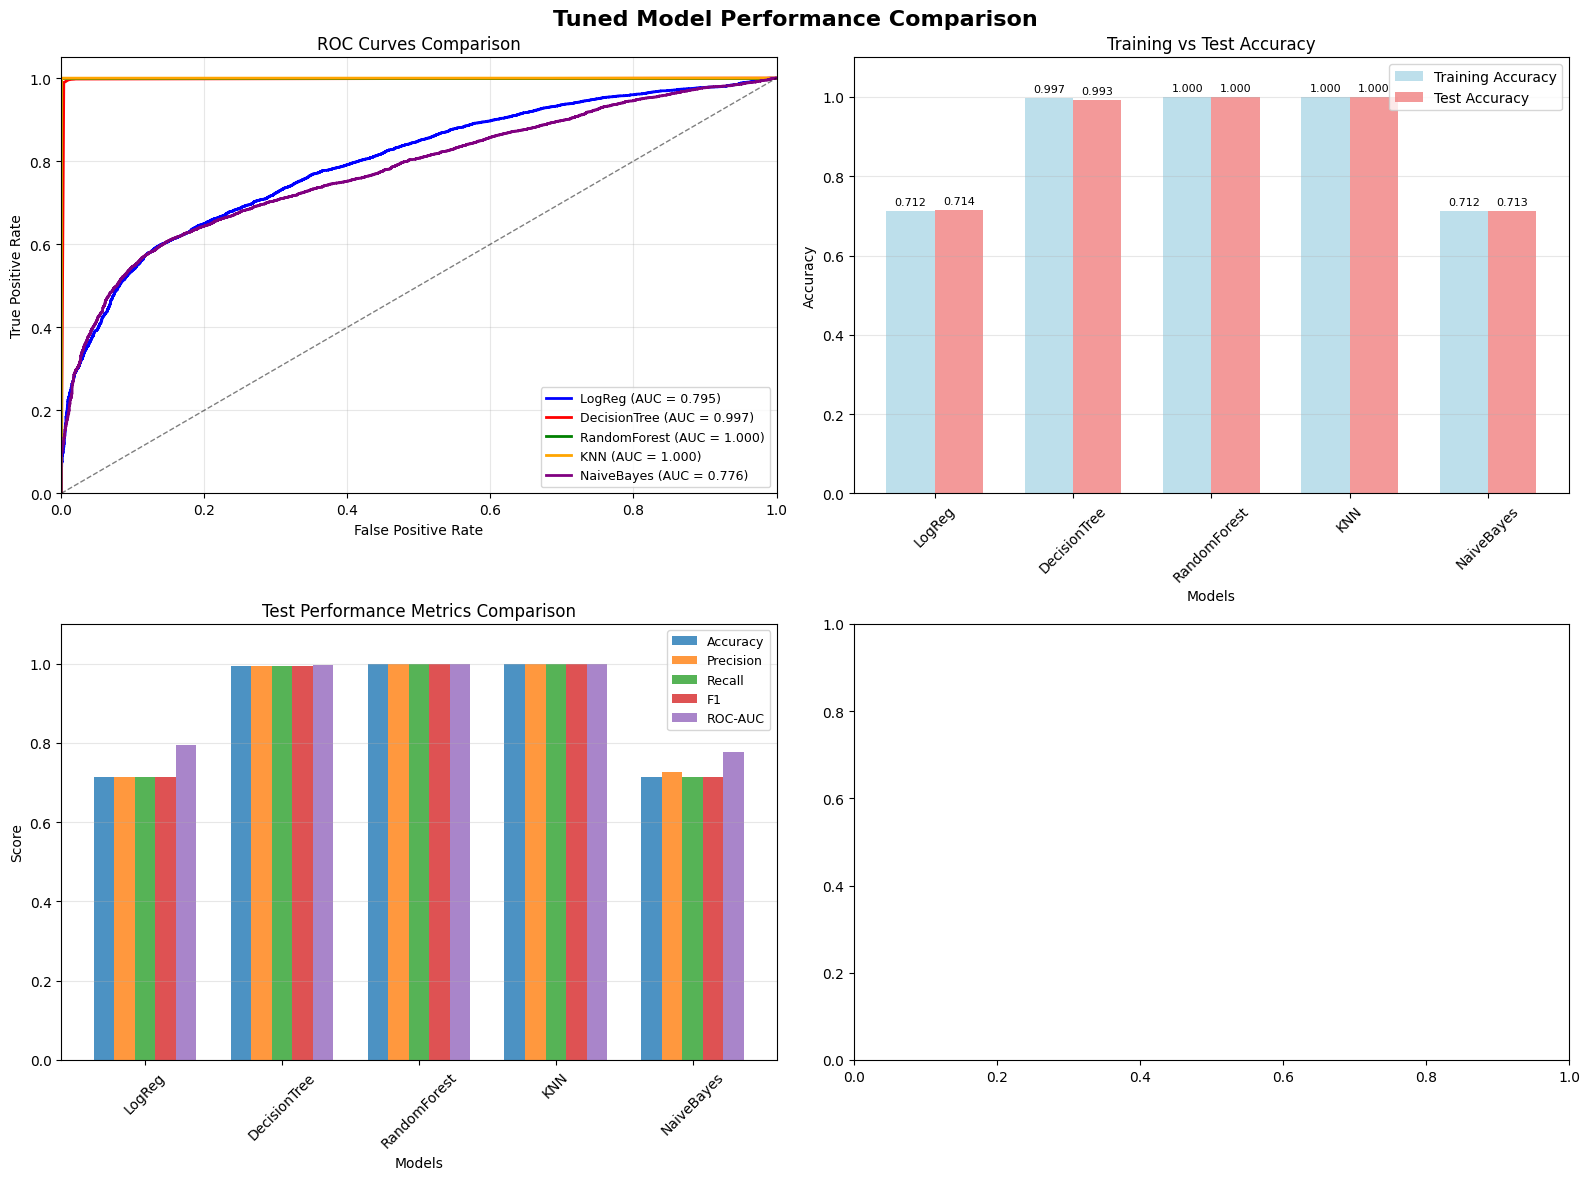


BEST PERFORMING MODELS
Best Accuracy: RandomForest (1.0000)
Best Precision: RandomForest (1.0000)
Best Recall: RandomForest (1.0000)
Best F1: RandomForest (1.0000)
Best ROC-AUC: RandomForest (1.0000)

DETAILED RESULTS TABLE
       Model  Train_Accuracy  Train_Precision  Train_Recall  Train_F1  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  ROC-AUC
      LogReg          0.7122           0.7118        0.7122    0.7120         0.7141          0.7135       0.7141   0.7137   0.7954
DecisionTree          0.9967           0.9967        0.9967    0.9967         0.9933          0.9933       0.9933   0.9933   0.9971
RandomForest          1.0000           1.0000        1.0000    1.0000         1.0000          1.0000       1.0000   1.0000   1.0000
         KNN          1.0000           1.0000        1.0000    1.0000         0.9996          0.9996       0.9996   0.9996   0.9998
  NaiveBayes          0.7115           0.7259        0.7115    0.7118         0.7128          0.7256       0.7128  

In [58]:


# Create comparison DataFrame
df_results = pd.DataFrame(tuned_results, columns=['Model', 'Train_Accuracy', 'Train_Precision', 'Train_Recall', 'Train_F1',
                                                 'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'ROC-AUC'])
print("\nResults Summary:")
print(df_results.round(4))

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Tuned Model Performance Comparison', fontsize=16, fontweight='bold')

# 1. ROC Curves Plot
ax1 = axes[0, 0]   
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, (name, (fpr, tpr, auc)) in enumerate(tuned_roc_curves.items()):
    if not np.isnan(auc):
        ax1.plot(fpr, tpr, color=colors[i], lw=2, 
                label=f'{name} (AUC = {auc:.3f})')
    else:
        ax1.plot([0, 1], [0, 1], color=colors[i], lw=2, linestyle='--',
                label=f'{name} (AUC = N/A)')

ax1.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--', alpha=0.5)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves Comparison')
ax1.legend(loc="lower right", fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Train vs Test Accuracy Comparison (Grouped Bar Plot)
ax2 = axes[0, 1]
x = np.arange(len(df_results))
width = 0.35

# Create grouped bars
train_bars = ax2.bar(x - width/2, df_results['Train_Accuracy'], width, 
                    label='Training Accuracy', alpha=0.8, color='lightblue')
test_bars = ax2.bar(x + width/2, df_results['Test_Accuracy'], width, 
                   label='Test Accuracy', alpha=0.8, color='lightcoral')

ax2.set_xlabel('Models')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training vs Test Accuracy')
ax2.set_xticks(x)
ax2.set_xticklabels(df_results['Model'], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 1.1)

# Add value labels on bars
for bar in train_bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

for bar in test_bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 3. Test Metrics Comparison Bar Plot
ax3 = axes[1, 0]
test_metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'ROC-AUC']
x = np.arange(len(df_results))
width = 0.15

for i, metric in enumerate(test_metrics):
    values = df_results[metric].fillna(0)  # Handle NaN values
    ax3.bar(x + i*width, values, width, label=metric.replace('Test_', ''), alpha=0.8)

ax3.set_xlabel('Models')
ax3.set_ylabel('Score')
ax3.set_title('Test Performance Metrics Comparison')
ax3.set_xticks(x + width*2)
ax3.set_xticklabels(df_results['Model'], rotation=45)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim(0, 1.1)




plt.tight_layout()
plt.show()

# Print best performing models
print("\n" + "=" * 60)
print("BEST PERFORMING MODELS")
print("=" * 60)
test_metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'ROC-AUC']
for metric in test_metrics:
    if metric == 'ROC-AUC':
        best_idx = df_results[metric].fillna(0).idxmax()
    else:
        best_idx = df_results[metric].idxmax()
    best_model = df_results.loc[best_idx, 'Model']
    best_score = df_results.loc[best_idx, metric]
    print(f"Best {metric.replace('Test_', '')}: {best_model} ({best_score:.4f})")





# Create a summary table
print("\n" + "=" * 60)
print("DETAILED RESULTS TABLE")
print("=" * 60)
print(df_results.to_string(index=False, float_format='%.4f'))

# Training vs Test Performance Summary
print("\n" + "=" * 60)
print("TRAINING VS TEST PERFORMANCE SUMMARY")
print("=" * 60)
comparison_summary = df_results[['Model', 'Train_Accuracy', 'Test_Accuracy']].copy()
comparison_summary['Difference'] = comparison_summary['Train_Accuracy'] - comparison_summary['Test_Accuracy']
comparison_summary['Generalization'] = comparison_summary['Test_Accuracy'] / comparison_summary['Train_Accuracy']
print(comparison_summary.to_string(index=False, float_format='%.4f'))

## 3. hyperparameters with feature scelecation

### 1. rfe with logistic regression

In [59]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)



In [60]:

# Models dictionary
rfe_tuned_models = {
    "LogReg": LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='liblinear', random_state=42),
    "DecisionTree": DecisionTreeClassifier(min_samples_split=10, 
                                           min_samples_leaf=5, 
                                           max_leaf_nodes=None, 
                                           max_features=None, 
                                           max_depth=None,
                                           criterion='gini', random_state=42),
    "RandomForest": RandomForestClassifier(bootstrap=True,
                                           max_depth=20, 
                                           max_features='sqrt', 
                                           min_samples_leaf=1, 
                                           min_samples_split=2, 
                                           n_estimators=200,
                                           random_state=42),
    "KNN": KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1, weights='distance'),  
    "NaiveBayes": GaussianNB(var_smoothing=1e-10)
}

# Storage for results
rfe_tuned_results = []
rfe_tuned_roc_curves = {}
rfe_tuned_model_predictions = {}
rfe_tuned_training_predictions = {}

print("=" * 60)
print("TRAINING MODELS AND COLLECTING RESULTS")
print("=" * 60)

# Train models and collect results
for name, model in rfe_tuned_models.items():
    print(f"\nTraining {name}...")
    
    # Fit model
    model.fit(X_train_rfe, y_train)
    
    # Make predictions on both train and test sets
    y_pred_train = model.predict(X_train_rfe)
    y_pred_test = model.predict(X_test_rfe)
    
    # Get probabilities for ROC curve (test set)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_rfe)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test_rfe)
    else:
        # For models without probability/decision function, use predicted values
        y_proba = y_pred_test.astype(float)
    
    # Calculate metrics for training set
    train_acc = accuracy_score(y_train, y_pred_train)
    train_prec = precision_score(y_train, y_pred_train, average='weighted')
    train_rec = recall_score(y_train, y_pred_train, average='weighted')
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    
    # Calculate metrics for test set
    test_acc = accuracy_score(y_test, y_pred_test)
    test_prec = precision_score(y_test, y_pred_test, average='weighted')
    test_rec = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    # ROC AUC for test set (handle potential issues)
    try:
        roc_auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        rfe_tuned_roc_curves[name] = (fpr, tpr, roc_auc)
    except:
        roc_auc = np.nan
        tuned_roc_curves[name] = (np.array([0, 1]), np.array([0, 1]), np.nan)
    
    # Store results (including both train and test metrics)
    rfe_tuned_results.append([name, train_acc, train_prec, train_rec, train_f1, 
                         test_acc, test_prec, test_rec, test_f1, roc_auc])
    rfe_tuned_model_predictions[name] = y_pred_test
    rfe_tuned_training_predictions[name] = y_pred_train
    
    # Print accuracy and classification report
    print(f"{name} - Training Accuracy: {train_acc:.4f}")
    print(f"{name} - Test Accuracy: {test_acc:.4f}")
    print(f"Overfitting Check: {train_acc - test_acc:.4f} ")
    print(f"{name} Test Classification Report:")
    print(classification_report(y_test, y_pred_test))
    print("-" * 50)



TRAINING MODELS AND COLLECTING RESULTS

Training LogReg...
LogReg - Training Accuracy: 0.7010
LogReg - Test Accuracy: 0.7028
Overfitting Check: -0.0018 
LogReg Test Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      5436
           1       0.73      0.75      0.74      6749

    accuracy                           0.70     12185
   macro avg       0.70      0.70      0.70     12185
weighted avg       0.70      0.70      0.70     12185

--------------------------------------------------

Training DecisionTree...
DecisionTree - Training Accuracy: 0.9918
DecisionTree - Test Accuracy: 0.9833
Overfitting Check: 0.0085 
DecisionTree Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5436
           1       0.99      0.98      0.98      6749

    accuracy                           0.98     12185
   macro avg       0.98      0.98      0.98 

### The same as before worse by 1%


Results Summary:
          Model  Train_Accuracy  Train_Precision  Train_Recall  Train_F1  \
0        LogReg          0.7010           0.7007        0.7010    0.7008   
1  DecisionTree          0.9918           0.9918        0.9918    0.9918   
2  RandomForest          0.9994           0.9994        0.9994    0.9994   
3           KNN          1.0000           1.0000        1.0000    1.0000   
4    NaiveBayes          0.7115           0.7267        0.7115    0.7117   

   Test_Accuracy  Test_Precision  Test_Recall  Test_F1  ROC-AUC  
0         0.7028          0.7020       0.7028   0.7023   0.7862  
1         0.9833          0.9833       0.9833   0.9833   0.9918  
2         0.9964          0.9964       0.9964   0.9964   0.9999  
3         0.9916          0.9916       0.9916   0.9916   0.9964  
4         0.7094          0.7229       0.7094   0.7098   0.7598  


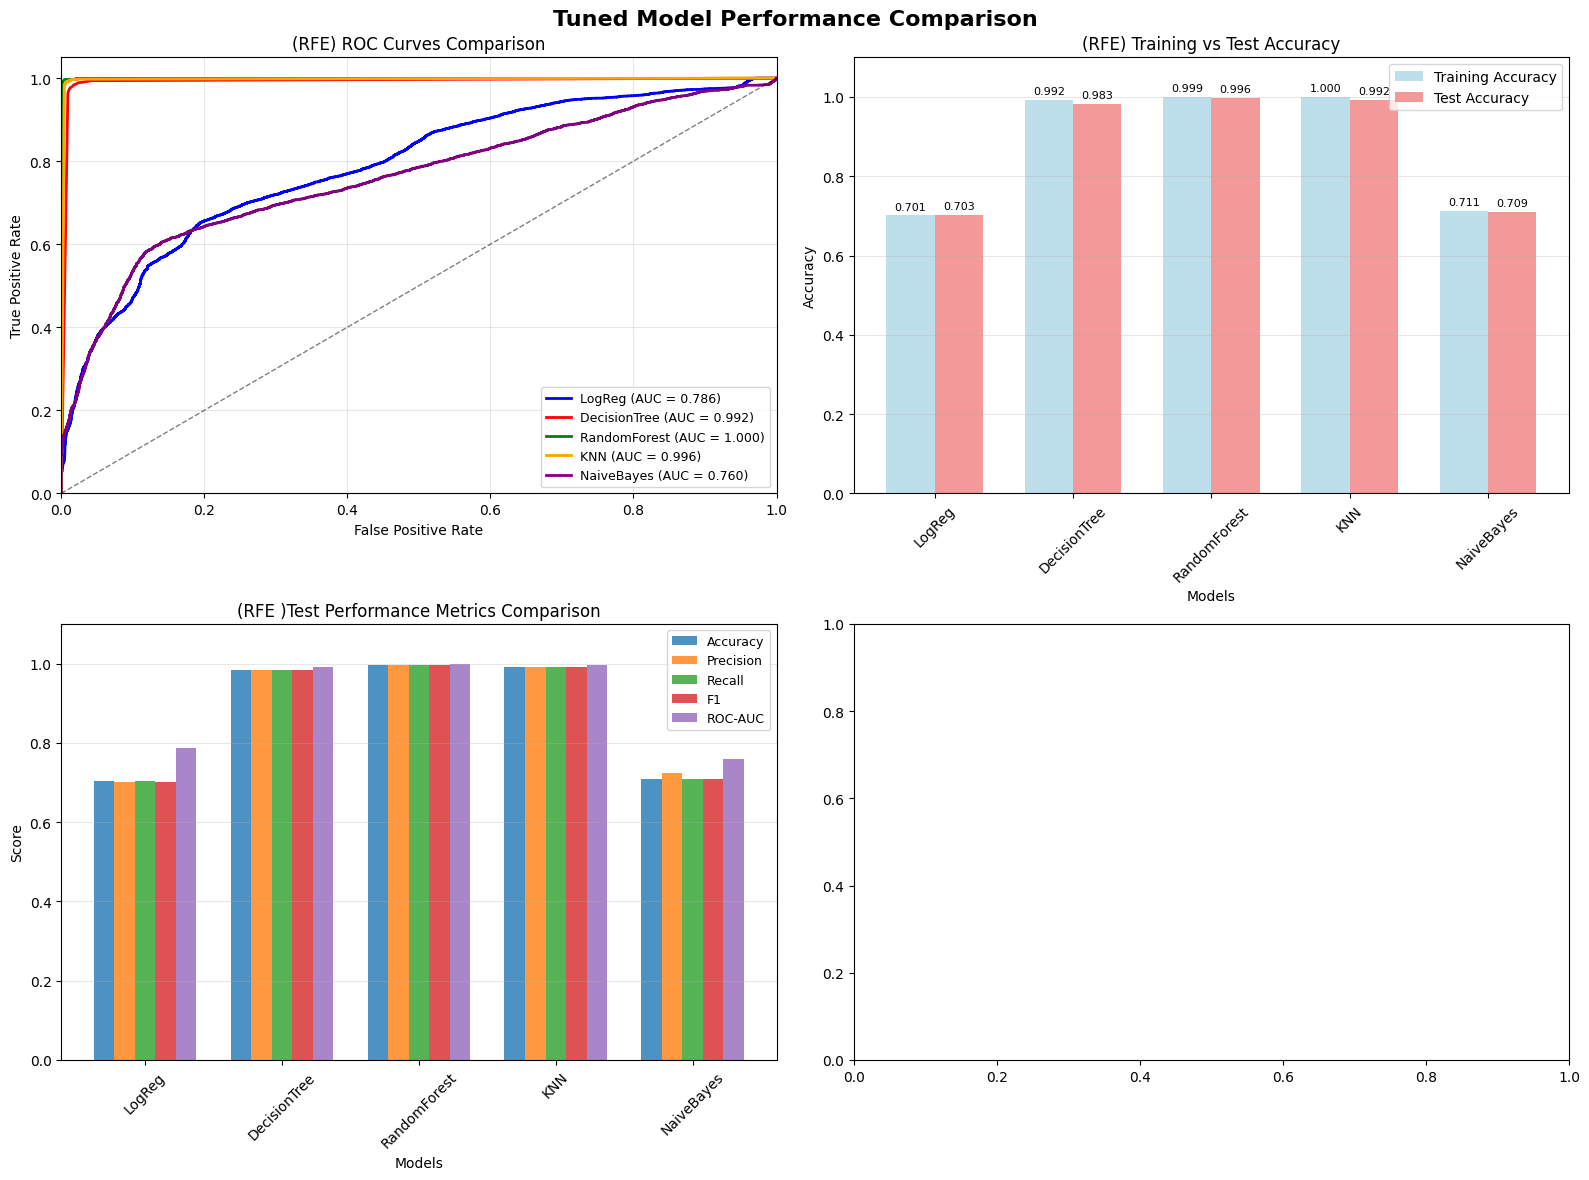


BEST PERFORMING MODELS
Best Accuracy: RandomForest (0.9964)
Best Precision: RandomForest (0.9964)
Best Recall: RandomForest (0.9964)
Best F1: RandomForest (0.9964)
Best ROC-AUC: RandomForest (0.9999)

DETAILED RESULTS TABLE
       Model  Train_Accuracy  Train_Precision  Train_Recall  Train_F1  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  ROC-AUC
      LogReg          0.7010           0.7007        0.7010    0.7008         0.7028          0.7020       0.7028   0.7023   0.7862
DecisionTree          0.9918           0.9918        0.9918    0.9918         0.9833          0.9833       0.9833   0.9833   0.9918
RandomForest          0.9994           0.9994        0.9994    0.9994         0.9964          0.9964       0.9964   0.9964   0.9999
         KNN          1.0000           1.0000        1.0000    1.0000         0.9916          0.9916       0.9916   0.9916   0.9964
  NaiveBayes          0.7115           0.7267        0.7115    0.7117         0.7094          0.7229       0.7094  

In [61]:


# Create comparison DataFrame
df_results = pd.DataFrame(rfe_tuned_results, columns=['Model', 'Train_Accuracy', 'Train_Precision', 'Train_Recall', 'Train_F1',
                                                 'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'ROC-AUC'])
print("\nResults Summary:")
print(df_results.round(4))

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Tuned Model Performance Comparison', fontsize=16, fontweight='bold')

# 1. ROC Curves Plot
ax1 = axes[0, 0]   
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, (name, (fpr, tpr, auc)) in enumerate(rfe_tuned_roc_curves.items()):
    if not np.isnan(auc):
        ax1.plot(fpr, tpr, color=colors[i], lw=2, 
                label=f'{name} (AUC = {auc:.3f})')
    else:
        ax1.plot([0, 1], [0, 1], color=colors[i], lw=2, linestyle='--',
                label=f'{name} (AUC = N/A)')

ax1.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--', alpha=0.5)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('(RFE) ROC Curves Comparison')
ax1.legend(loc="lower right", fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Train vs Test Accuracy Comparison (Grouped Bar Plot)
ax2 = axes[0, 1]
x = np.arange(len(df_results))
width = 0.35

# Create grouped bars
train_bars = ax2.bar(x - width/2, df_results['Train_Accuracy'], width, 
                    label='Training Accuracy', alpha=0.8, color='lightblue')
test_bars = ax2.bar(x + width/2, df_results['Test_Accuracy'], width, 
                   label='Test Accuracy', alpha=0.8, color='lightcoral')

ax2.set_xlabel('Models')
ax2.set_ylabel('Accuracy')
ax2.set_title('(RFE) Training vs Test Accuracy')
ax2.set_xticks(x)
ax2.set_xticklabels(df_results['Model'], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 1.1)

# Add value labels on bars
for bar in train_bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

for bar in test_bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 3. Test Metrics Comparison Bar Plot
ax3 = axes[1, 0]
test_metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'ROC-AUC']
x = np.arange(len(df_results))
width = 0.15

for i, metric in enumerate(test_metrics):
    values = df_results[metric].fillna(0)  # Handle NaN values
    ax3.bar(x + i*width, values, width, label=metric.replace('Test_', ''), alpha=0.8)

ax3.set_xlabel('Models')
ax3.set_ylabel('Score')
ax3.set_title('(RFE )Test Performance Metrics Comparison')
ax3.set_xticks(x + width*2)
ax3.set_xticklabels(df_results['Model'], rotation=45)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim(0, 1.1)




plt.tight_layout()
plt.show()

# Print best performing models
print("\n" + "=" * 60)
print("BEST PERFORMING MODELS")
print("=" * 60)
test_metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'ROC-AUC']
for metric in test_metrics:
    if metric == 'ROC-AUC':
        best_idx = df_results[metric].fillna(0).idxmax()
    else:
        best_idx = df_results[metric].idxmax()
    best_model = df_results.loc[best_idx, 'Model']
    best_score = df_results.loc[best_idx, metric]
    print(f"Best {metric.replace('Test_', '')}: {best_model} ({best_score:.4f})")





# Create a summary table
print("\n" + "=" * 60)
print("DETAILED RESULTS TABLE")
print("=" * 60)
print(df_results.to_string(index=False, float_format='%.4f'))

# Training vs Test Performance Summary
print("\n" + "=" * 60)
print("TRAINING VS TEST PERFORMANCE SUMMARY")
print("=" * 60)
comparison_summary = df_results[['Model', 'Train_Accuracy', 'Test_Accuracy']].copy()
comparison_summary['Difference'] = comparison_summary['Train_Accuracy'] - comparison_summary['Test_Accuracy']
comparison_summary['Generalization'] = comparison_summary['Test_Accuracy'] / comparison_summary['Train_Accuracy']
print(comparison_summary.to_string(index=False, float_format='%.4f'))

### 2. Embeded with decision tree

In [62]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Get important features
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1][:10]  # top 10

X_train_tree = X_train[:, indices]
X_test_tree = X_test[:, indices]



In [63]:

# Models dictionary
tree_tuned_models = {
    "LogReg": LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='liblinear', random_state=42),
    "DecisionTree": DecisionTreeClassifier(min_samples_split=10, 
                                           min_samples_leaf=5, 
                                           max_leaf_nodes=None, 
                                           max_features=None, 
                                           max_depth=None,
                                           criterion='gini', random_state=42),
    "RandomForest": RandomForestClassifier(bootstrap=True,
                                           max_depth=20, 
                                           max_features='sqrt', 
                                           min_samples_leaf=1, 
                                           min_samples_split=2, 
                                           n_estimators=200,
                                           random_state=42),
    "KNN": KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1, weights='distance'),  
    "NaiveBayes": GaussianNB(var_smoothing=1e-10)
}

# Storage for results
tree_tuned_results = []
tree_tuned_roc_curves = {}
tree_tuned_model_predictions = {}
tree_tuned_training_predictions = {}

print("=" * 60)
print("TRAINING MODELS AND COLLECTING RESULTS")
print("=" * 60)

# Train models and collect results
for name, model in tree_tuned_models.items():
    print(f"\nTraining {name}...")
    
    # Fit model
    model.fit(X_train_tree, y_train)
    
    # Make predictions on both train and test sets
    y_pred_train = model.predict(X_train_tree)
    y_pred_test = model.predict(X_test_tree)
    
    # Get probabilities for ROC curve (test set)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_tree)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test_tree)
    else:
        # For models without probability/decision function, use predicted values
        y_proba = y_pred_test.astype(float)
    
    # Calculate metrics for training set
    train_acc = accuracy_score(y_train, y_pred_train)
    train_prec = precision_score(y_train, y_pred_train, average='weighted')
    train_rec = recall_score(y_train, y_pred_train, average='weighted')
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    
    # Calculate metrics for test set
    test_acc = accuracy_score(y_test, y_pred_test)
    test_prec = precision_score(y_test, y_pred_test, average='weighted')
    test_rec = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    # ROC AUC for test set (handle potential issues)
    try:
        roc_auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        tree_tuned_roc_curves[name] = (fpr, tpr, roc_auc)
    except:
        roc_auc = np.nan
        tree_tuned_roc_curves[name] = (np.array([0, 1]), np.array([0, 1]), np.nan)
    
    # Store results (including both train and test metrics)
    tree_tuned_results.append([name, train_acc, train_prec, train_rec, train_f1, 
                         test_acc, test_prec, test_rec, test_f1, roc_auc])
    tree_tuned_model_predictions[name] = y_pred_test
    tree_tuned_training_predictions[name] = y_pred_train
    
    # Print accuracy and classification report
    print(f"{name} - Training Accuracy: {train_acc:.4f}")
    print(f"{name} - Test Accuracy: {test_acc:.4f}")
    print(f"Overfitting Check: {train_acc - test_acc:.4f} ")
    print(f"{name} Test Classification Report:")
    print(classification_report(y_test, y_pred_test))
    print("-" * 50)



TRAINING MODELS AND COLLECTING RESULTS

Training LogReg...
LogReg - Training Accuracy: 0.7005
LogReg - Test Accuracy: 0.7060
Overfitting Check: -0.0055 
LogReg Test Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.65      0.66      5436
           1       0.73      0.75      0.74      6749

    accuracy                           0.71     12185
   macro avg       0.70      0.70      0.70     12185
weighted avg       0.71      0.71      0.71     12185

--------------------------------------------------

Training DecisionTree...
DecisionTree - Training Accuracy: 0.9944
DecisionTree - Test Accuracy: 0.9892
Overfitting Check: 0.0051 
DecisionTree Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5436
           1       0.99      0.99      0.99      6749

    accuracy                           0.99     12185
   macro avg       0.99      0.99      0.99 

### The same


Results Summary:
          Model  Train_Accuracy  Train_Precision  Train_Recall  Train_F1  \
0        LogReg          0.7005           0.6998        0.7005    0.7000   
1  DecisionTree          0.9944           0.9944        0.9944    0.9944   
2  RandomForest          1.0000           1.0000        1.0000    1.0000   
3           KNN          1.0000           1.0000        1.0000    1.0000   
4    NaiveBayes          0.7004           0.7151        0.7004    0.7006   

   Test_Accuracy  Test_Precision  Test_Recall  Test_F1  ROC-AUC  
0         0.7060          0.7051       0.7060   0.7053   0.7742  
1         0.9892          0.9893       0.9892   0.9892   0.9957  
2         0.9996          0.9996       0.9996   0.9996   1.0000  
3         0.9986          0.9986       0.9986   0.9986   0.9996  
4         0.6993          0.7126       0.6993   0.6997   0.7507  


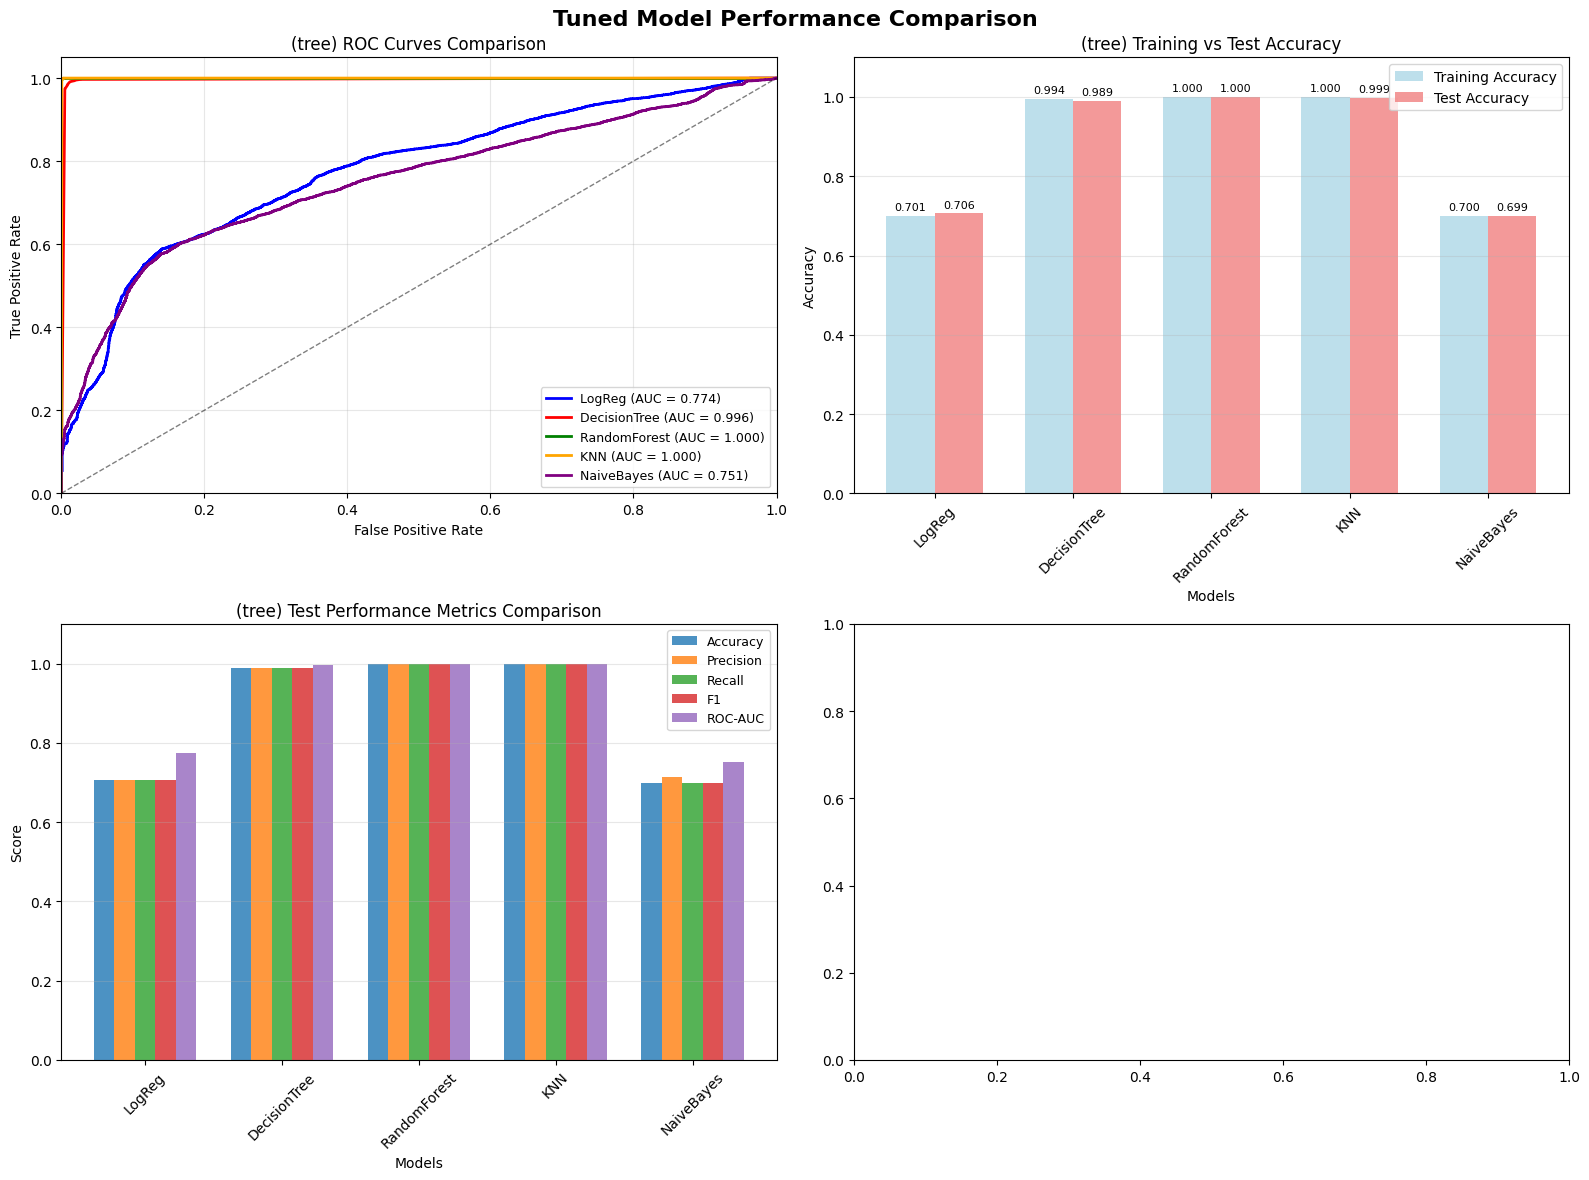


BEST PERFORMING MODELS
Best Accuracy: RandomForest (0.9996)
Best Precision: RandomForest (0.9996)
Best Recall: RandomForest (0.9996)
Best F1: RandomForest (0.9996)
Best ROC-AUC: RandomForest (1.0000)

DETAILED RESULTS TABLE
       Model  Train_Accuracy  Train_Precision  Train_Recall  Train_F1  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  ROC-AUC
      LogReg          0.7005           0.6998        0.7005    0.7000         0.7060          0.7051       0.7060   0.7053   0.7742
DecisionTree          0.9944           0.9944        0.9944    0.9944         0.9892          0.9893       0.9892   0.9892   0.9957
RandomForest          1.0000           1.0000        1.0000    1.0000         0.9996          0.9996       0.9996   0.9996   1.0000
         KNN          1.0000           1.0000        1.0000    1.0000         0.9986          0.9986       0.9986   0.9986   0.9996
  NaiveBayes          0.7004           0.7151        0.7004    0.7006         0.6993          0.7126       0.6993  

In [64]:


# Create comparison DataFrame
df_results = pd.DataFrame(tree_tuned_results, columns=['Model', 'Train_Accuracy', 'Train_Precision', 'Train_Recall', 'Train_F1',
                                                 'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'ROC-AUC'])
print("\nResults Summary:")
print(df_results.round(4))

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Tuned Model Performance Comparison', fontsize=16, fontweight='bold')

# 1. ROC Curves Plot
ax1 = axes[0, 0]   
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, (name, (fpr, tpr, auc)) in enumerate(tree_tuned_roc_curves.items()):
    if not np.isnan(auc):
        ax1.plot(fpr, tpr, color=colors[i], lw=2, 
                label=f'{name} (AUC = {auc:.3f})')
    else:
        ax1.plot([0, 1], [0, 1], color=colors[i], lw=2, linestyle='--',
                label=f'{name} (AUC = N/A)')

ax1.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--', alpha=0.5)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('(tree) ROC Curves Comparison')
ax1.legend(loc="lower right", fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Train vs Test Accuracy Comparison (Grouped Bar Plot)
ax2 = axes[0, 1]
x = np.arange(len(df_results))
width = 0.35

# Create grouped bars
train_bars = ax2.bar(x - width/2, df_results['Train_Accuracy'], width, 
                    label='Training Accuracy', alpha=0.8, color='lightblue')
test_bars = ax2.bar(x + width/2, df_results['Test_Accuracy'], width, 
                   label='Test Accuracy', alpha=0.8, color='lightcoral')

ax2.set_xlabel('Models')
ax2.set_ylabel('Accuracy')
ax2.set_title('(tree) Training vs Test Accuracy')
ax2.set_xticks(x)
ax2.set_xticklabels(df_results['Model'], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 1.1)

# Add value labels on bars
for bar in train_bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

for bar in test_bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 3. Test Metrics Comparison Bar Plot
ax3 = axes[1, 0]
test_metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'ROC-AUC']
x = np.arange(len(df_results))
width = 0.15

for i, metric in enumerate(test_metrics):
    values = df_results[metric].fillna(0)  # Handle NaN values
    ax3.bar(x + i*width, values, width, label=metric.replace('Test_', ''), alpha=0.8)

ax3.set_xlabel('Models')
ax3.set_ylabel('Score')
ax3.set_title('(tree) Test Performance Metrics Comparison')
ax3.set_xticks(x + width*2)
ax3.set_xticklabels(df_results['Model'], rotation=45)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim(0, 1.1)




plt.tight_layout()
plt.show()

# Print best performing models
print("\n" + "=" * 60)
print("BEST PERFORMING MODELS")
print("=" * 60)
test_metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'ROC-AUC']
for metric in test_metrics:
    if metric == 'ROC-AUC':
        best_idx = df_results[metric].fillna(0).idxmax()
    else:
        best_idx = df_results[metric].idxmax()
    best_model = df_results.loc[best_idx, 'Model']
    best_score = df_results.loc[best_idx, metric]
    print(f"Best {metric.replace('Test_', '')}: {best_model} ({best_score:.4f})")





# Create a summary table
print("\n" + "=" * 60)
print("DETAILED RESULTS TABLE")
print("=" * 60)
print(df_results.to_string(index=False, float_format='%.4f'))

# Training vs Test Performance Summary
print("\n" + "=" * 60)
print("TRAINING VS TEST PERFORMANCE SUMMARY")
print("=" * 60)
comparison_summary = df_results[['Model', 'Train_Accuracy', 'Test_Accuracy']].copy()
comparison_summary['Difference'] = comparison_summary['Train_Accuracy'] - comparison_summary['Test_Accuracy']
comparison_summary['Generalization'] = comparison_summary['Test_Accuracy'] / comparison_summary['Train_Accuracy']
print(comparison_summary.to_string(index=False, float_format='%.4f'))

# FEature importance added but there is no names of the features because column transformer remove the names but the features is alsmost the same importance and all affect the model


Top 10 Features by Importance:
       Feature  Importance
5    feature_5    0.133279
13  feature_13    0.099445
14  feature_14    0.094403
4    feature_4    0.085431
16  feature_16    0.081100
15  feature_15    0.074895
10  feature_10    0.071241
1    feature_1    0.055719
6    feature_6    0.053802
0    feature_0    0.051527


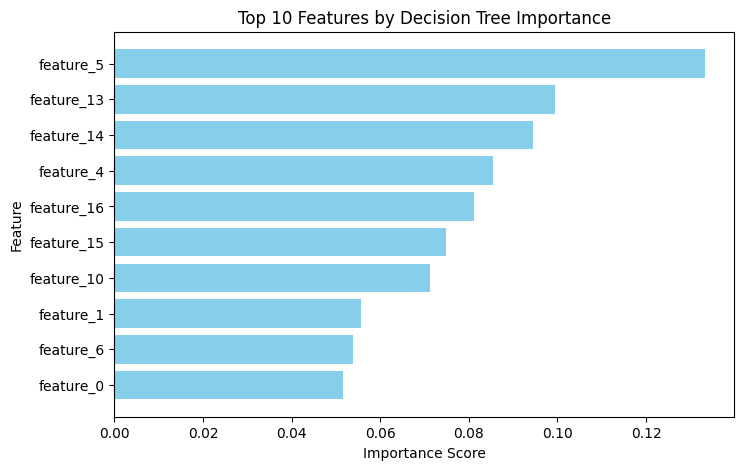


Accuracy with top 10 features: 0.9926


In [65]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Get importances
importances = tree.feature_importances_

# Handle feature names
try:
    feature_names = X_train.columns
except AttributeError:
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]

# Rank features
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Print top 10
print("\nTop 10 Features by Importance:")
print(importance_df.head(10))

# ===== Visualization =====
k = 10
top_k = importance_df.head(k)

plt.figure(figsize=(8, 5))
plt.barh(top_k["Feature"], top_k["Importance"], color="skyblue")
plt.gca().invert_yaxis()  # most important at top
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title(f"Top {k} Features by Decision Tree Importance")
plt.show()

# ===== Retrain using top k =====
if isinstance(X_train, pd.DataFrame):
    X_train_tree = X_train[top_k["Feature"]]
    X_test_tree = X_test[top_k["Feature"]]
else:  # NumPy arrays
    indices = top_k.index
    X_train_tree = X_train[:, indices]
    X_test_tree = X_test[:, indices]

tree.fit(X_train_tree, y_train)
y_pred_tree = tree.predict(X_test_tree)

print(f"\nAccuracy with top {k} features: {accuracy_score(y_test, y_pred_tree):.4f}")

# Pipeline for downloading the preprocessing steps with feature selecation and the model

In [66]:
model =RandomForestClassifier(bootstrap=True,
                                           max_depth=20, 
                                           max_features='sqrt', 
                                           min_samples_leaf=1, 
                                           min_samples_split=2, 
                                           n_estimators=200,
                                           random_state=42)

selector = SelectFromModel(DecisionTreeClassifier(random_state=42))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
mushroom_best_imputer = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', selector),
    ('classifier', model)
])
mushroom_best_imputer.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('Custom_scalar',
                                                                   CustomScaler())]),
                                                  ['cap-diameter',
                                                   'cap-surface',
                                                   'gill-attachment',
                                                   'gill-spacing',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('bin',
                                                  Pipeline(steps=[('label',
                                                                   OrdinalEncoder())]),
                                                  ['does-bruise-or-bleed',
                                                   'gill-spacing',
                                                   'has-ring']),
                                                 ('med',
                                                  P...
                                                                   CountEncoder(combine_min_nan_groups=True))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'season',
                                                   'gill-attachment']),
                                                 ('high',
                                                  Pipeline(steps=[('bayes',
                                                                   TargetEncoder())]),
                                                  ['cap-color', 'gill-color',
                                                   'stem-surface',
                                                   'stem-color'])])),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=42))),
                ('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=200,
                                        random_state=42))])

In [67]:
joblib.dump(mushroom_best_imputer, "mushroom_best_pipeline_KNN_imputer.joblib")

['mushroom_best_pipeline_KNN_imputer.joblib']